# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a type of data analysis aimed at identifying patterns and relationships within a dataset while also formulating hypotheses. It typically serves as the initial step in working with data, allowing data analysts to gain insights and a better understanding of the information at hand. As a result of EDA, essential data preprocessing operations are defined to prepare the dataset for further analysis and applications.

The following example is conducted on the titanic dataset, commonly used to learn Machine Learning skills.

Datasource:  
_Will Cukierski. (2012). Titanic - Machine Learning from Disaster. Kaggle. https://kaggle.com/competitions/titanic_

# <img src="../references/images/Titanic_1.png" width="800"/>


## Preliminary Data Analysis

In the preliminary data analysis, our goal is to obtain a general understanding of the dataset.
There are 12 columns in the dataset:

- **Survived**: 1 for survived and 0 for perished
- **PassengerId**: Unique Id of a passenger
- **Pclass**: Ticket class
- **Name**: Passenger name
- **Sex**: Sex
- **Age**: age in years
- **SibSp**: # of siblings / spouses aboard Titanic
- **Parch**: # of parents / children aboard Titanic
- **Ticket**: Ticket number
- **Fare**: Passenger fare
- **Cabin**: Cabin number
- **Embarked**: Port of embarkation (S - Southampton, C- Cherbourg, Q- Queenstown)


In [ ]:
# import all the necessary libraries and modules for the project 
# %pip install missingno
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from sklearn.model_selection import train_test_split

import missingno as msno

from sklearn.preprocessing import LabelEncoder

# sys path to import the modules from the src folder 
sys.path.append('../')

In [7]:
# Needed until seaborn gets updated
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [10]:
# This code reads a CSV file containing Titanic data 
# into a pandas DataFrame and displays the first few rows.
titanic = pd.read_csv('../data/external/train.csv')
titanic_predict = pd.read_csv('../data/external/predict.csv')

 

In [ ]:
# Display the first 20 rows of the training data
titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Display the first 20 rows of the prediction data
titanic_predict.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:

# This code displays information about the columns in the DataFrame, including the data type 
# of each column and the number of non-null values in each column.   
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
# Verify the shape of the Titanic dataset
print(titanic.shape)  # Expected output: (891, 12)

(891, 12)


In [18]:
# Display the dimensions of the dataset.
# Generate descriptive statistics for the Titanic dataset using the `describe` method 
# with the parameter `include='all'` to include all columns in the summary statistics output 
titanic.describe(include='all')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


<Figure size 1400x800 with 0 Axes>

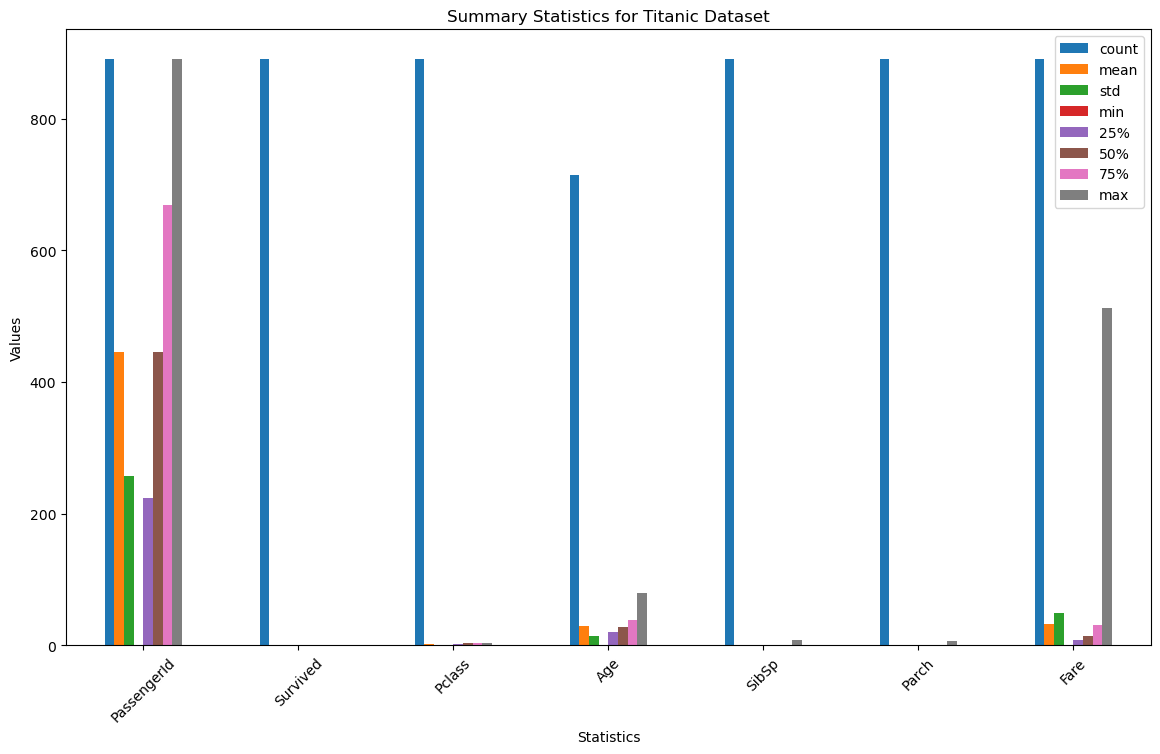

In [25]:
# Plot the summary statistics using a different approach
summary_stats = titanic.describe().transpose()

# Plot the summary statistics using a bar plot
plt.figure(figsize=(14, 8))
summary_stats.plot(kind='bar', figsize=(14, 8))
plt.title('Summary Statistics for Titanic Dataset')
plt.xlabel('Statistics')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


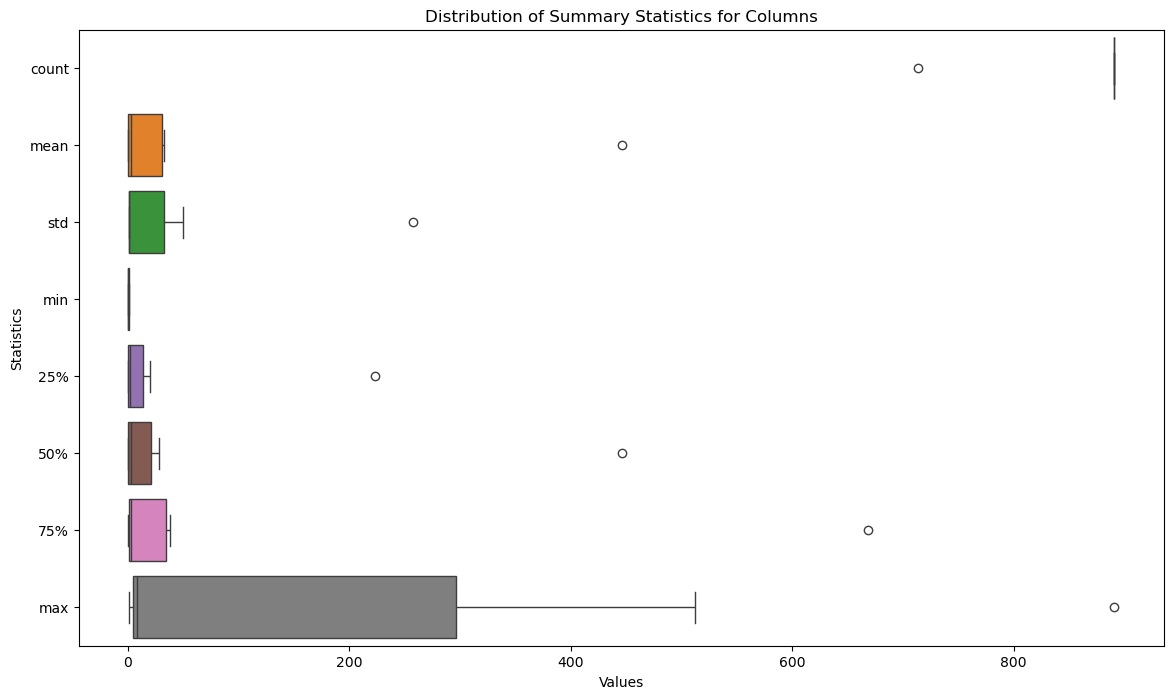

In [27]:
# Get the summary statistics of the DataFrame
summary_stats = titanic.describe()

# Transpose the summary statistics for easier plotting
summary_stats = summary_stats.transpose()

# Plot the distribution of the summary statistics
plt.figure(figsize=(14, 8))
sns.boxplot(data=summary_stats, orient='h')
plt.title('Distribution of Summary Statistics for Columns')
plt.xlabel('Values')
plt.ylabel('Statistics')
plt.show()


In [28]:
# Display the number of missing values in the Titanic dataset 
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
# Display the number of missing values in the Titanic prediction dataset
titanic_predict.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [32]:
# Display the column names of the Titanic tesdaing dataset using the `columns` attribute of the DataFrame.
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [33]:
# The number of columns in the predict dataset 
num_columns_train = titanic.shape[1]

# Display the number of columns in the train dataset
print(f"The number of columns in the train dataset is: {num_columns_train}")

# The number of columns in the predict dataset 
num_columns_predict =  titanic.shape[1]
print(f"The number of columns in the predict dataset is: {num_columns_predict}")

The number of columns in the train dataset is: 12
The number of columns in the predict dataset is: 12


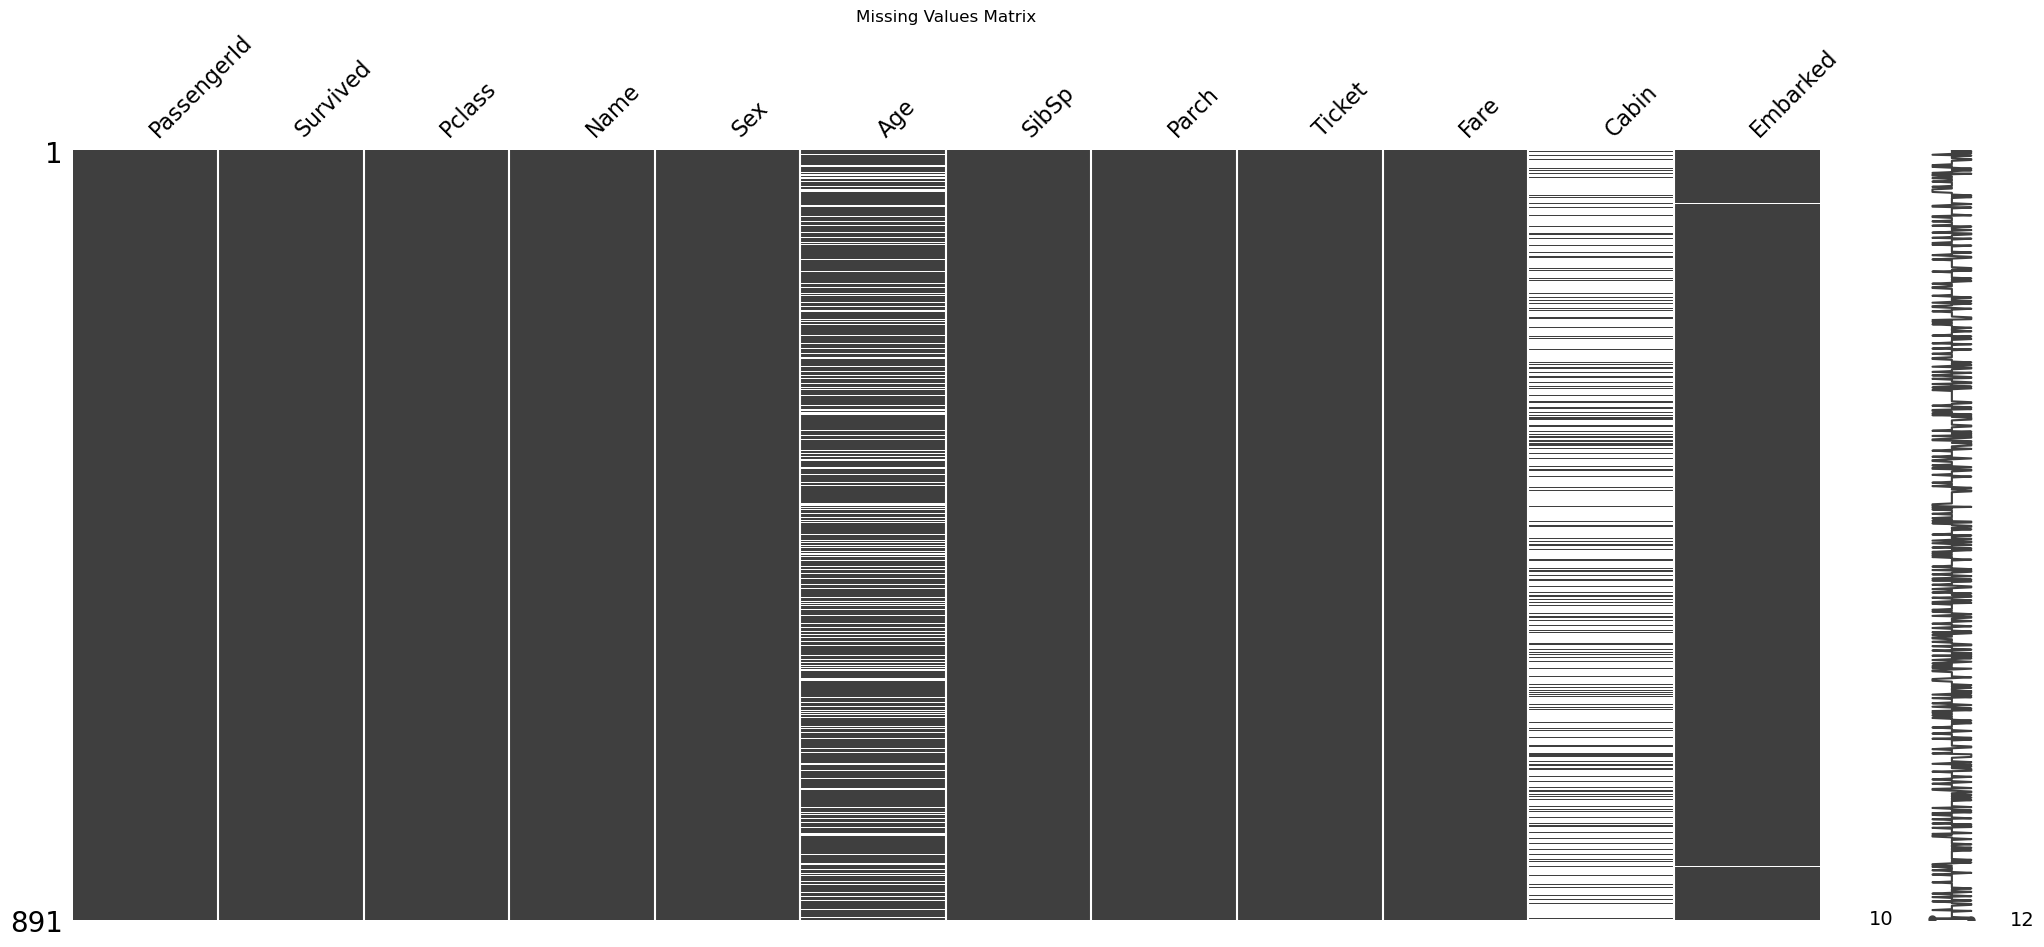

In [34]:
# Visualize the missing values in the dataset using missingno
msno.matrix(titanic)
plt.title('Missing Values Matrix')
plt.show()

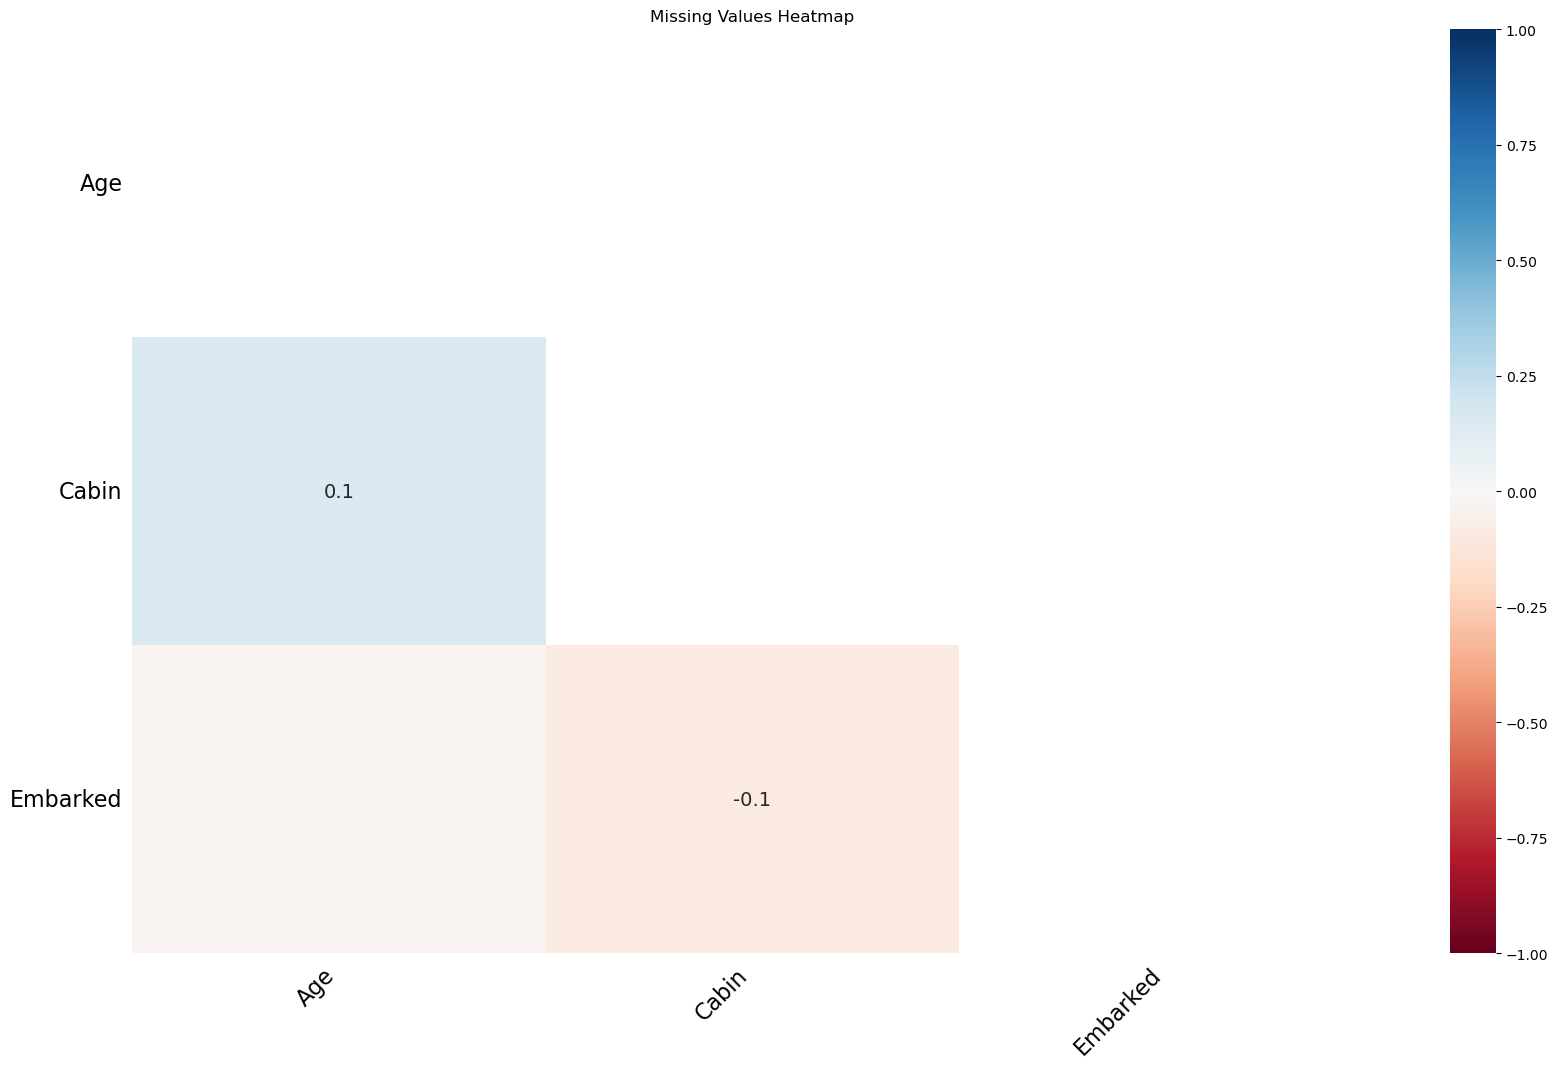

In [35]:
# Visualize the missing values heatmap
msno.heatmap(titanic)
plt.title('Missing Values Heatmap')
plt.show()

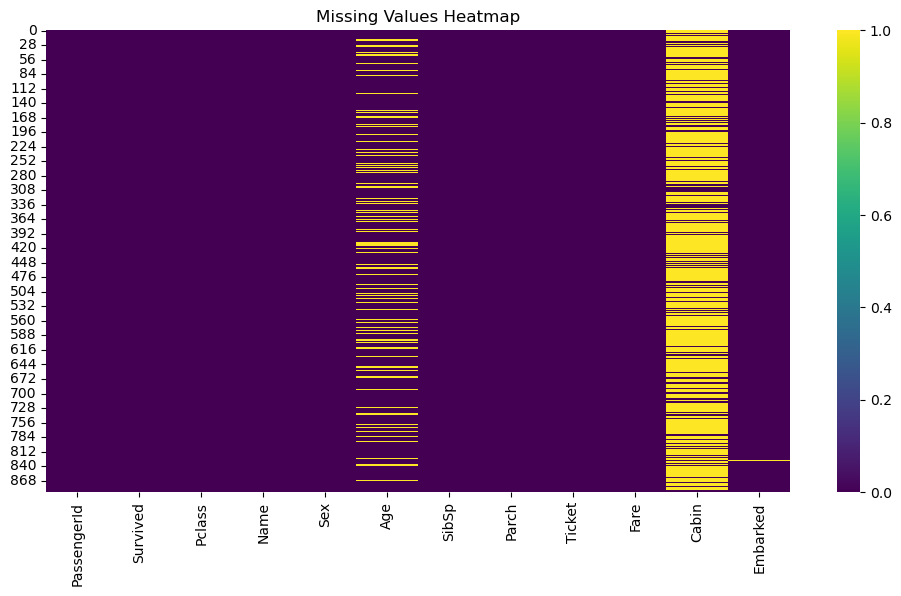

In [36]:
# Visualize the missing values in the dataset using seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(titanic.isnull(), cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [41]:
# Display the number of missing values in the DataFrame 
# using the `isnull` method and the `sum` method on the entire DataFrame.
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:

# Display the percentage of passengers that survived and did not survive by using the `value_counts` method on the 'Survived' column
# with the parameter `normalize=True` to output the relative frequencies of the unique values in the column.
titanic['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

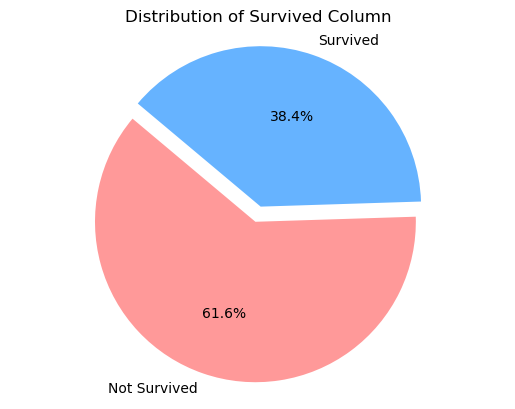

In [55]:
# Plot the percentage of passengers that survived and did not survive by using pie chart
labels = ['Not Survived', 'Survived']
sizes = [len(titanic[titanic['Survived'] == 0]), len(titanic[titanic['Survived'] == 1])]
colors = ['#ff9999', '#66b3ff']  # colors
explode = (0.1, 0)  # explode the 1st slice (Not Survived)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)   
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title('Distribution of Survived Column')
plt.show()


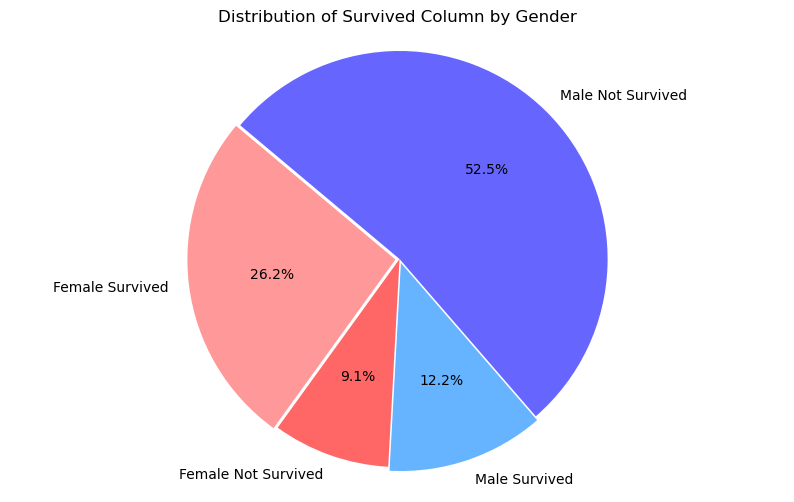

In [ ]:
# Plot the distribution of the 'Survived' by gender using a pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title('Distribution of Survived Column by Gender')
plt.show()


In [73]:

# Display the percentage of passengers that embarked from each port by using the `value_counts` method on the 'Embarked' column
# with the parameter `normalize=True` to output the relative frequencies of the unique values in the column.
titanic['Embarked'].value_counts(normalize=True)
# print(titanic['Embarked'].value_counts())

Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64

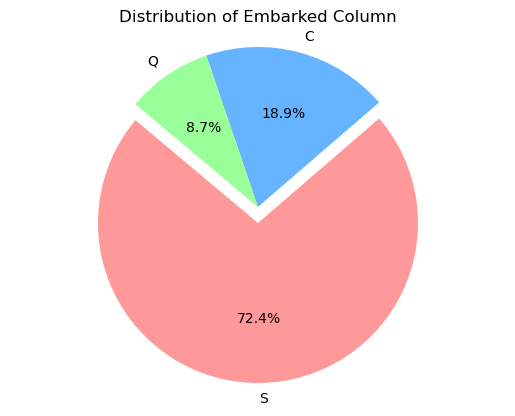

In [76]:
# Plot the percentage of passengers that embarked from each port using a pie chart
labels = ['S', 'C', 'Q']
sizes = [len(titanic[titanic['Embarked'] == 'S']), len(titanic[titanic['Embarked'] == 'C']), len(titanic[titanic['Embarked'] == 'Q'])]
colors = ['#ff9999', '#66b3ff', '#99ff99']  # colors
explode = (0.1, 0, 0)  # explode the 1st slice (Not Survived)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)   
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title('Distribution of Embarked Column')
plt.show()

In [78]:
# Display the value counts of the 'Sex' and 'Pclass' columns of the 
# Titanic dataset using the `value_counts` method.
titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

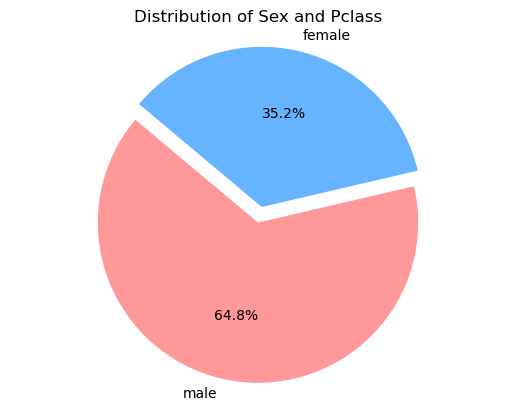

In [80]:
# Plot the distribution of the 'Sex' and 'Pclass' columns using a pie chart
labels = ['male', 'female']
sizes = [len(titanic[titanic['Sex'] == 'male']), len(titanic[titanic['Sex'] == 'female'])]
colors = ['#ff9999', '#66b3ff']  # colors
explode = (0.1, 0)  # explode the 1st slice (Not Survived)  
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)   
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title('Distribution of Sex and Pclass')   
plt.show()


In [81]:
# Display the value counts of the 'Pclass' column of the 
# Titanic dataset using the `value_counts` method.
titanic['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

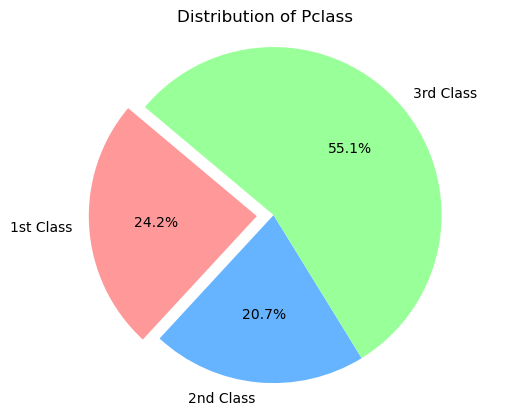

In [82]:
# Plot the distribution of the 'Pclass' column using a pie chart
labels = ['1st Class', '2nd Class', '3rd Class']
sizes = [len(titanic[titanic['Pclass'] == 1]), len(titanic[titanic['Pclass'] == 2]), len(titanic[titanic['Pclass'] == 3])]
colors = ['#ff9999', '#66b3ff', '#99ff99']  # colors
explode = (0.1, 0, 0)  # explode the 1st slice (Not Survived)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)   
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title('Distribution of Pclass')   
plt.show()

In [83]:
 # display the number of unique values in the each column of 
 # the Titanic dataset using the `nunique` method.
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

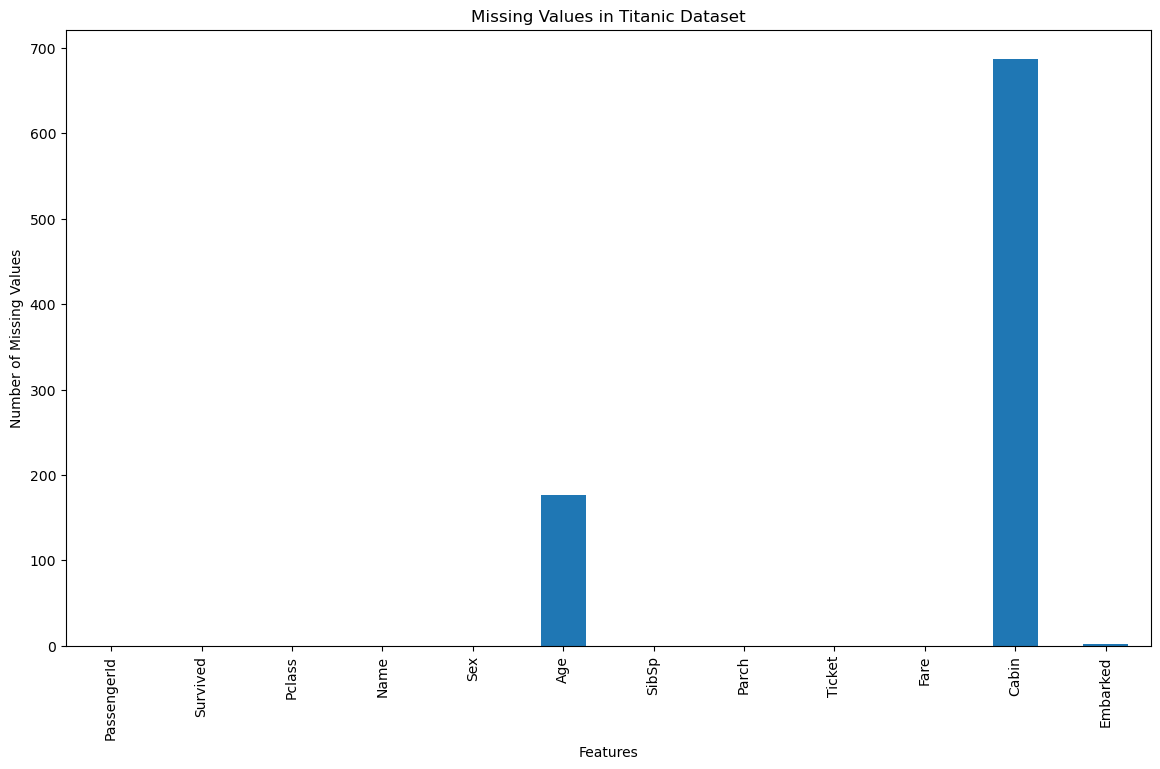

In [84]:
# Plot the missing values in the dataset using a bar plot
titanic.isnull().sum().plot(kind='bar', figsize=(14, 8))
plt.title('Missing Values in Titanic Dataset')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.show()

In [85]:
# Display the number of unique values in the 'Ticket' column of 
# the Titanic dataset using the `nunique` method.
titanic['Ticket'].nunique()

681

In [86]:
#  display the dimensions of the DataFrame using the `shape` attribute.
titanic.shape # (891, 12) it means that the DataFrame has 891 rows and 12 columns

(891, 12)

In [88]:
# Display the data types of the columns in the Titanic dataset using the `dtypes` attribute.
categorical_cols = list(titanic.select_dtypes(include=['object', 'category']).columns)
numerical_cols = list(titanic.select_dtypes(include=['number']).columns)

# Display the number of categorical and numerical columns in the Titanic dataset.
print("Categorical columns ({}):".format(len(categorical_cols)))
for col in categorical_cols:
    print(" -", col)

# Display the number of numerical columns in the Titanic dataset.
print("\nNumerical columns ({}):".format(len(numerical_cols)))
for col in numerical_cols:
    print(" -", col)
    

Categorical columns (5):
 - Name
 - Sex
 - Ticket
 - Cabin
 - Embarked

Numerical columns (7):
 - PassengerId
 - Survived
 - Pclass
 - Age
 - SibSp
 - Parch
 - Fare


In [92]:
# Display the first few rows of the categorical and numerical columns
print("\nFirst few rows of categorical columns:")
display(titanic[categorical_cols].head())

print("\nFirst few rows of numerical columns:")
display(titanic[numerical_cols].head())


First few rows of categorical columns:


,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S



First few rows of numerical columns:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


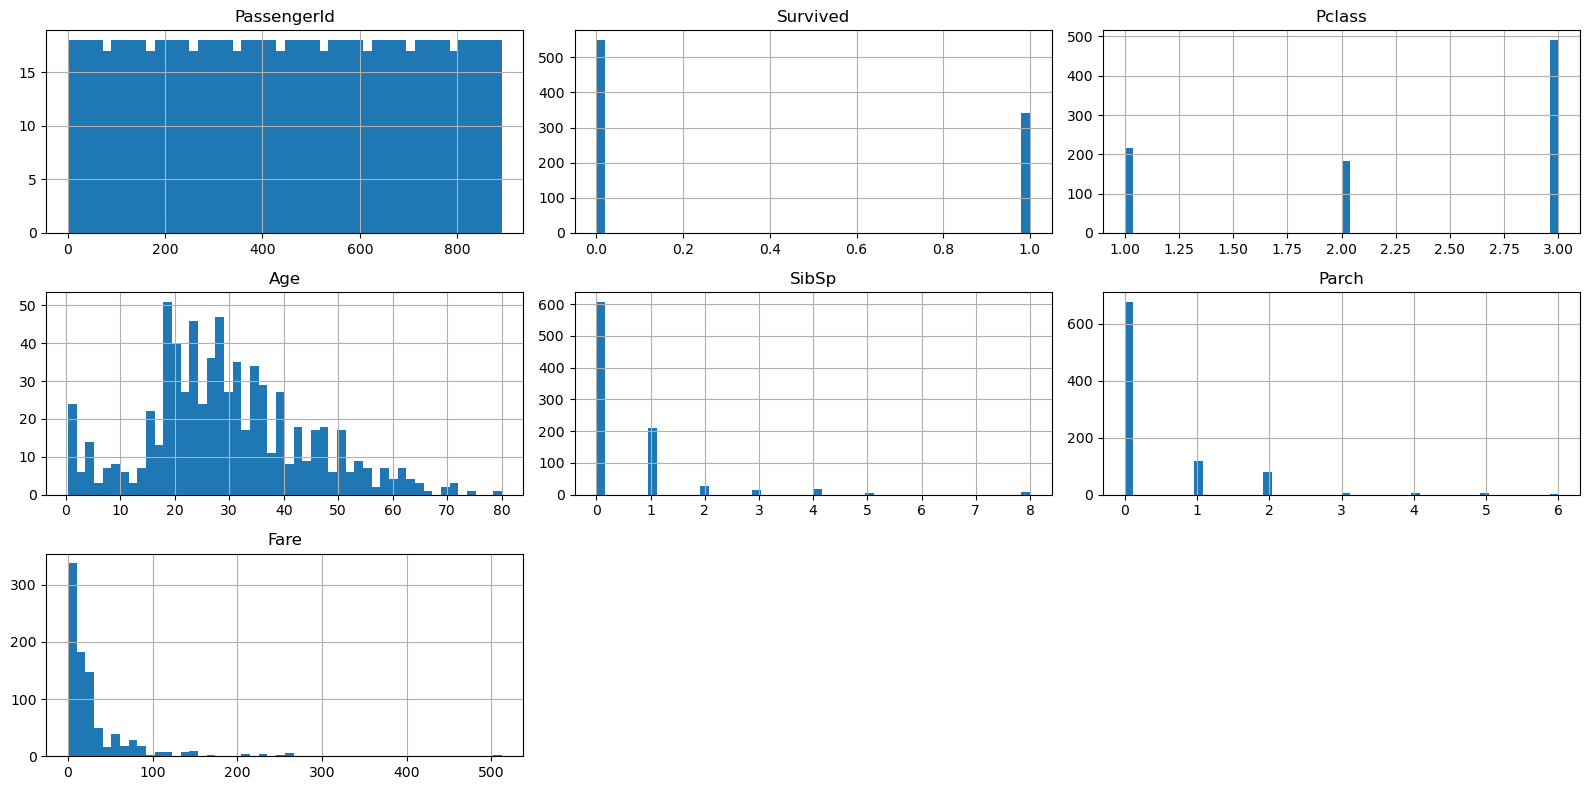

In [95]:
# Display the histogram of numerical features in the dataset
titanic.hist(bins=50, figsize=(16,8))
plt.tight_layout()  # Adjust the subplots to fit into the figure area.
plt.show()

In [96]:
# Display the available plotting styles in Matplotlib 
pprint(plt.style.available)

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']


In [97]:
# Set the style of the plots using the parameter `style='seaborn-v0_8'` 
# to use the 'seaborn-v0_8' style.
plt.style.use('seaborn-v0_8')

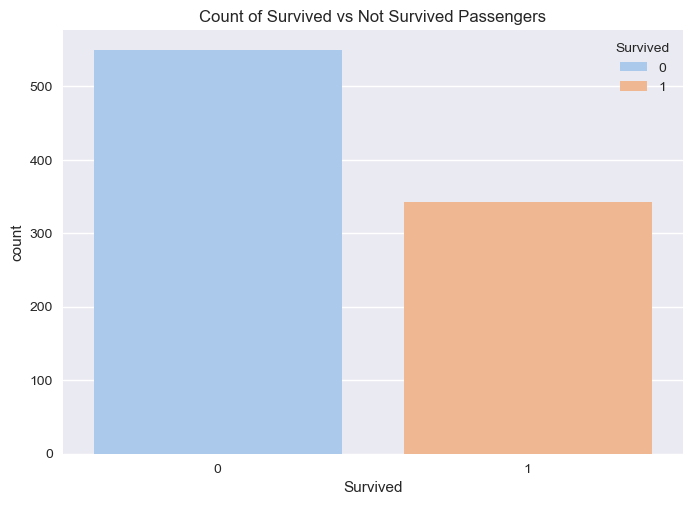

In [98]:
# coutplot of the 'Survived' column in the Titanic dataset using seaborn 
# to visualize the distribution of the target variable. 
sns.countplot(x='Survived', data=titanic, palette='pastel', hue='Survived')
plt.title('Count of Survived vs Not Survived Passengers')
plt.show()

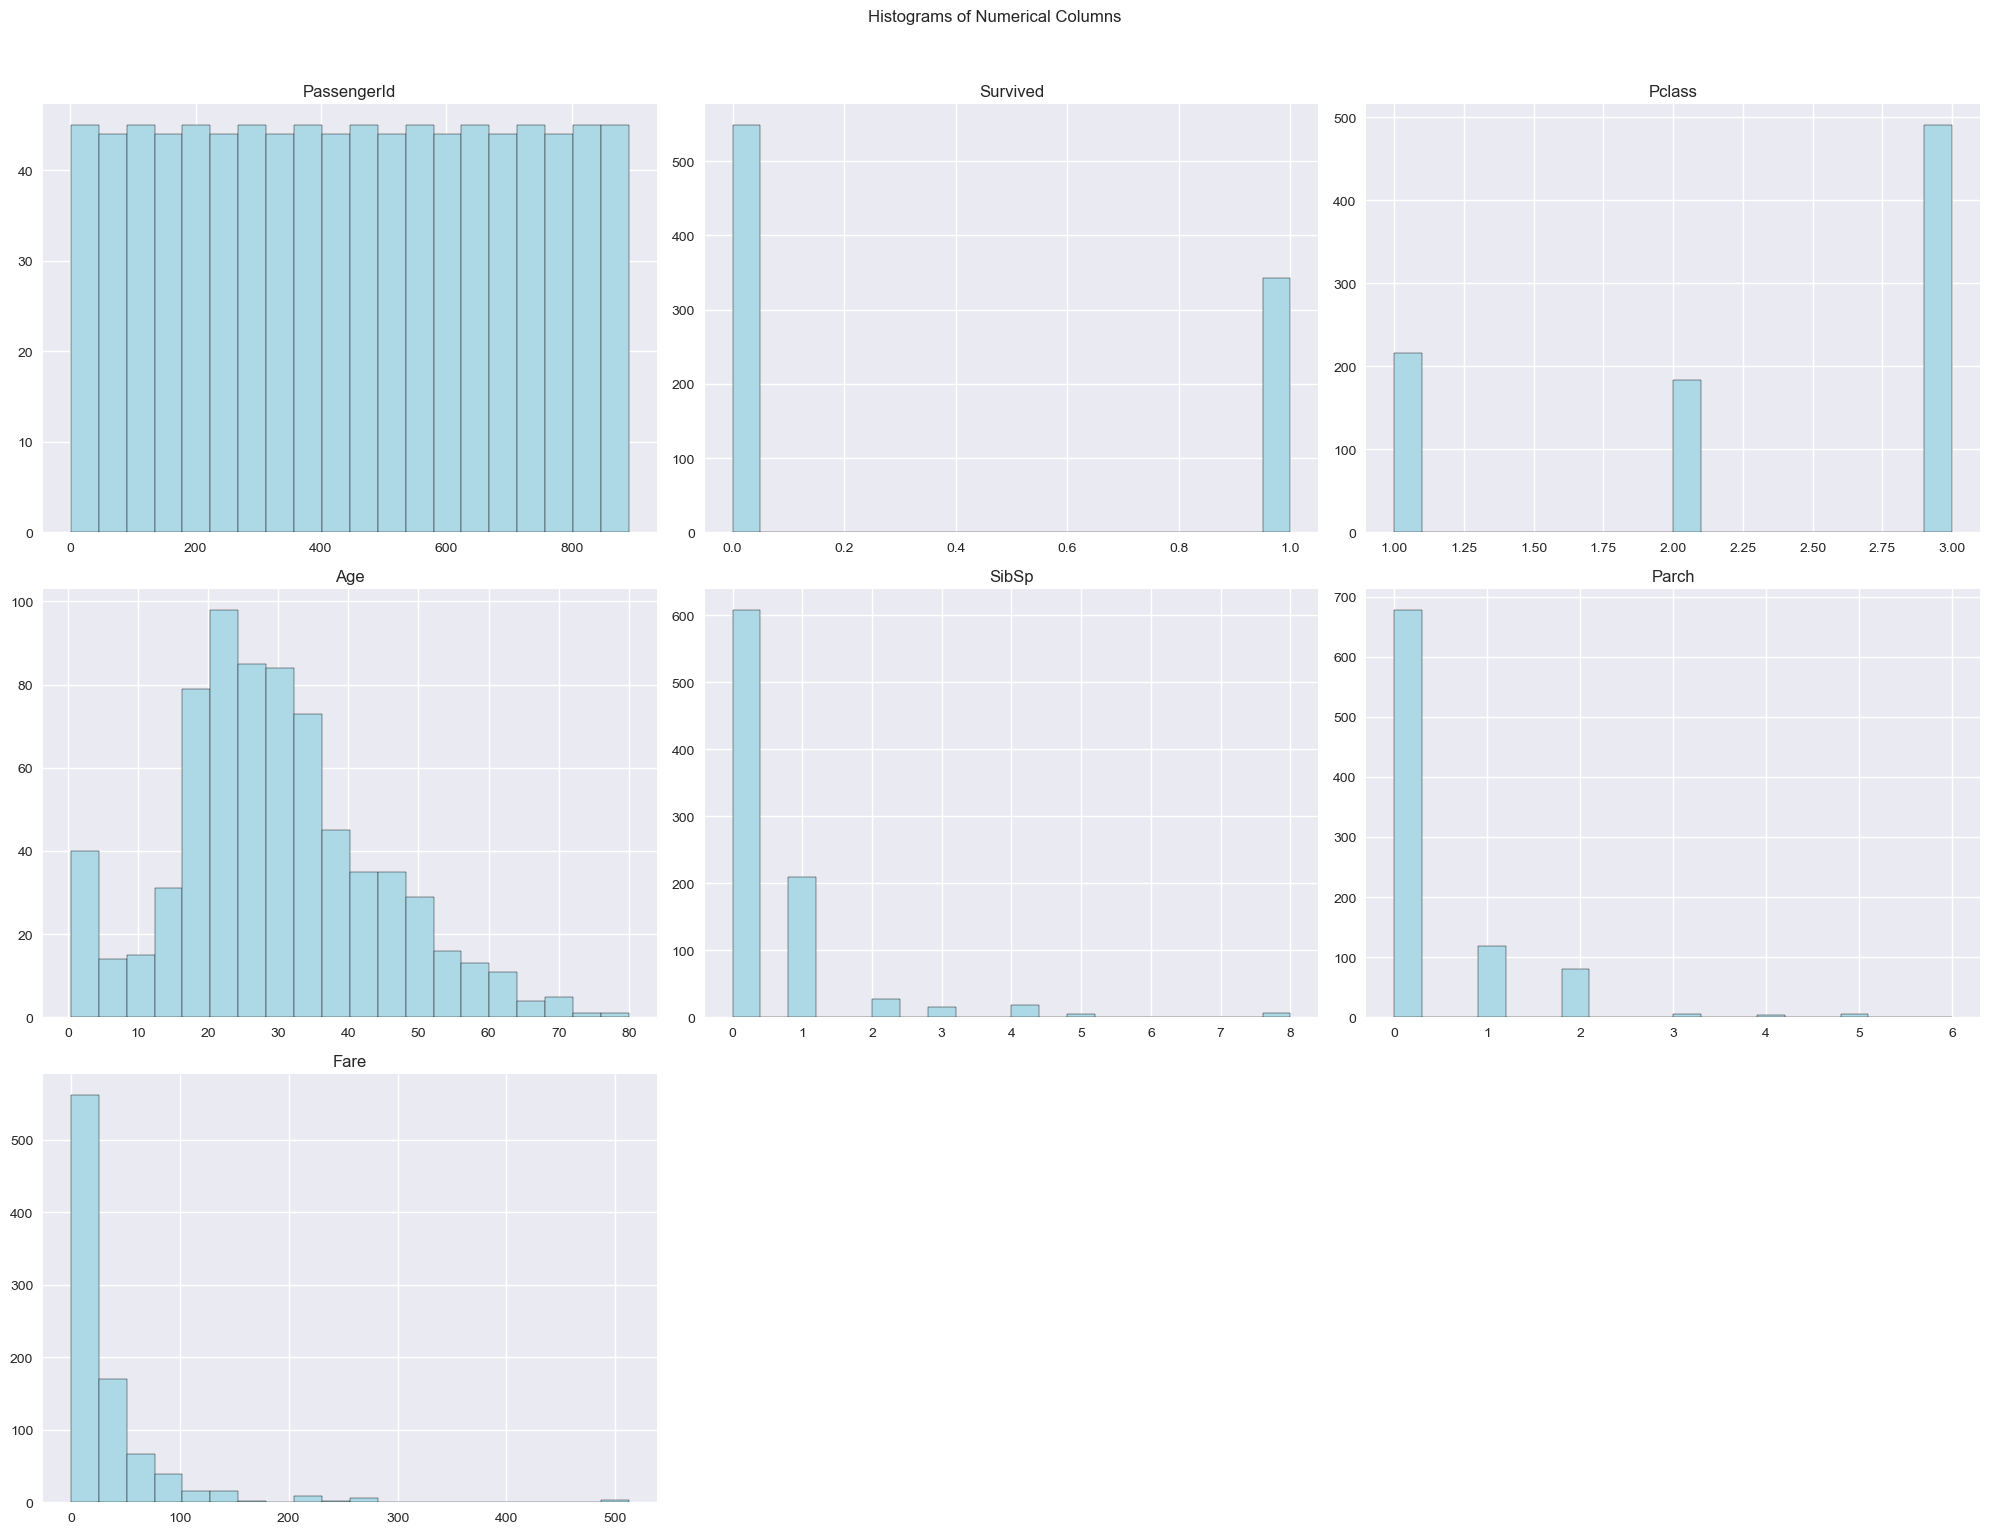

In [99]:
# Plot histograms of numerical columns in the train dataset
titanic.hist(bins=20, figsize=(20, 15), color='lightblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Columns', y=1.02)
plt.tight_layout()
plt.show()

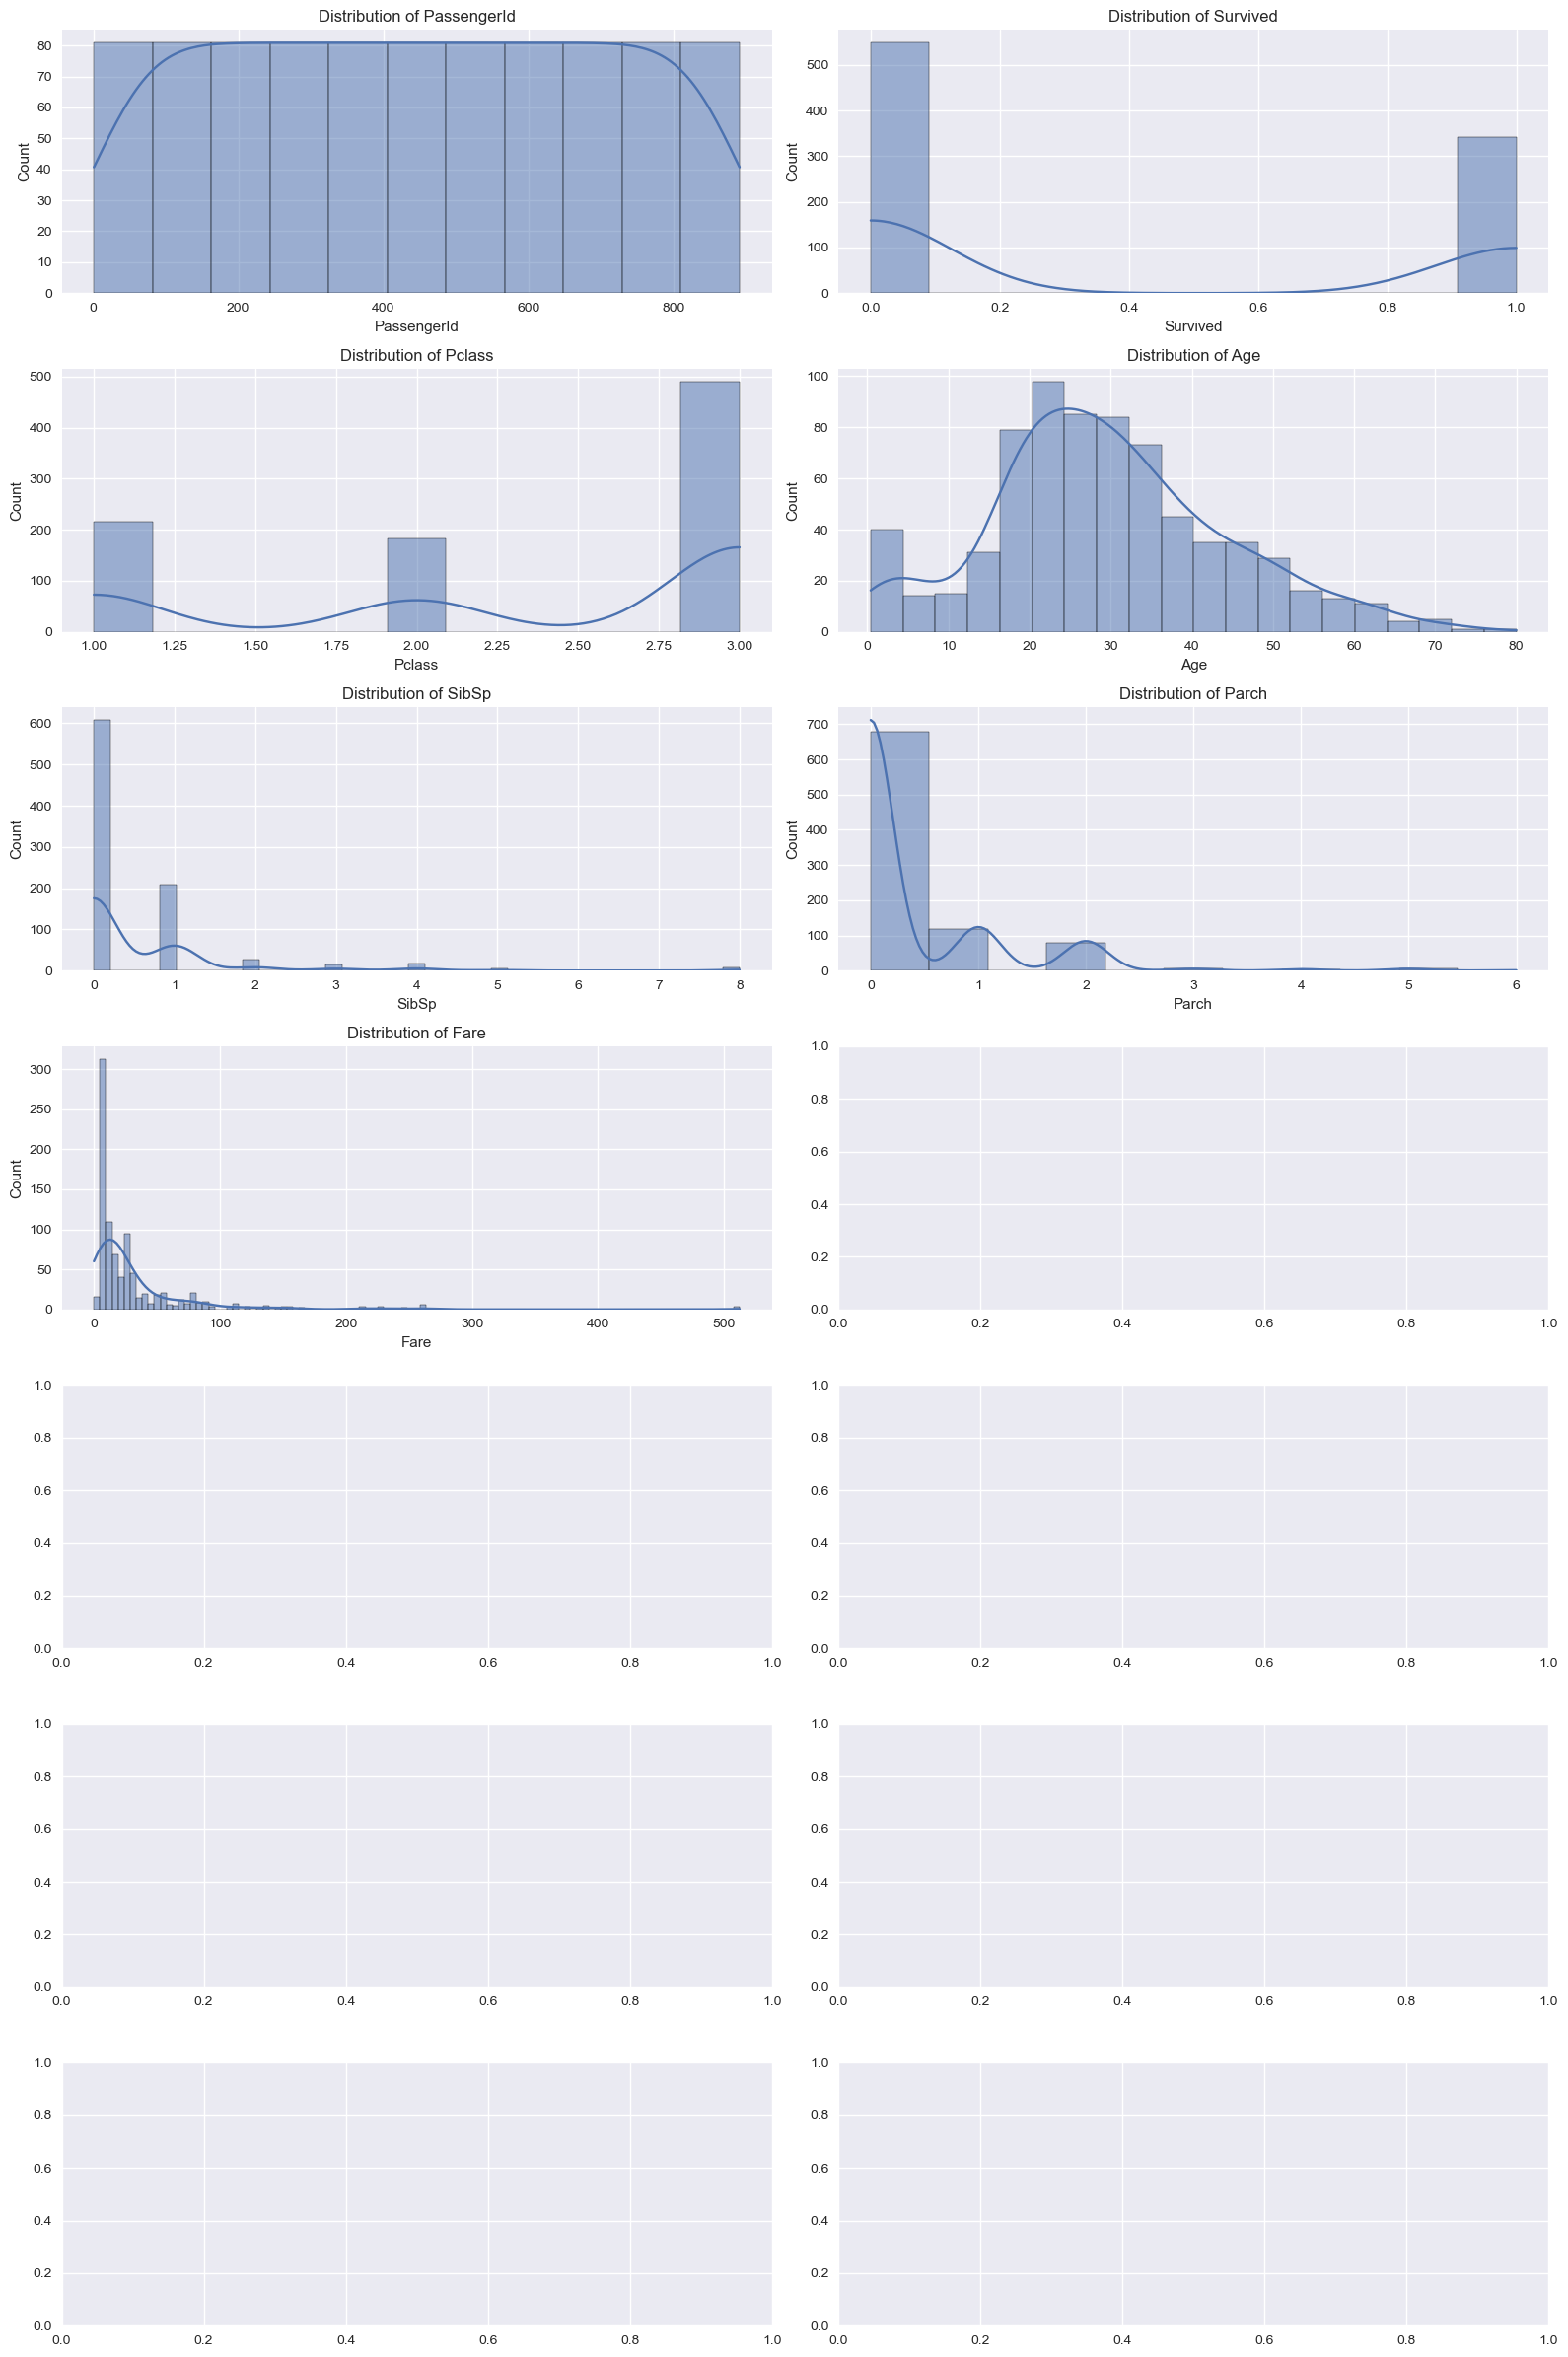

In [100]:
# Plot the distribution of each column using seaborn
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(16, 24))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot numerical columns
num_idx = 0
cat_idx = len(numerical_cols)  # Start plotting categorical columns after numerical columns

for column in titanic.columns:
    if titanic[column].dtype in ['int64', 'float64']:
        sns.histplot(data=titanic, x=column, kde=True, ax=axes[num_idx])
        axes[num_idx].set_title(f'Distribution of {column}')
        axes[num_idx].set_xlabel(column)
        axes[num_idx].set_ylabel('Count')
        num_idx += 1

# Plot categorical columns
for column in titanic.columns:
    if titanic[column].dtype == 'int32':
        sns.countplot(data=titanic, x=column, ax=axes[cat_idx])
        axes[cat_idx].set_title(f'Distribution of {column}')
        axes[cat_idx].set_xlabel(column)
        axes[cat_idx].set_ylabel('Count')
        axes[cat_idx].tick_params(axis='x', rotation=45)
        cat_idx += 1

# Adjust layout
plt.tight_layout()
plt.show()

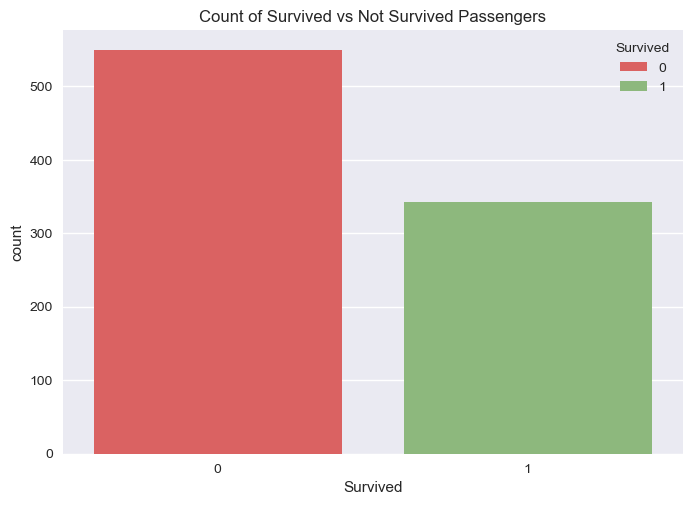

In [101]:
# Count of survived and not survived passengers in the dataset using the `countplot` function
sns.countplot(x='Survived', data=titanic, palette={0: '#EE4E4E', 1: '#88C273'}, hue='Survived')
plt.title('Count of Survived vs Not Survived Passengers')
plt.show()

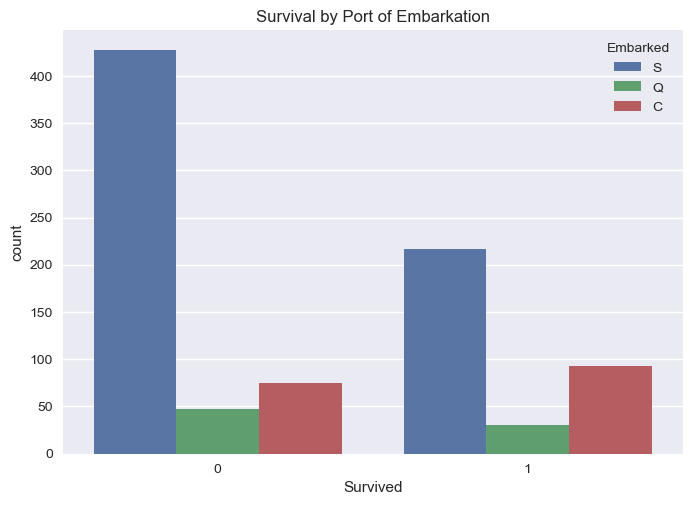

In [102]:
# Check if there is a difference in the value of survived 
# Check the port of embarkment and whether or not the ship is alive with the help of a bar plot 
# using the `countplot` function from the `seaborn` library.
sns.countplot(x='Survived', hue='Embarked', data=titanic)
plt.title('Survival by Port of Embarkation')
plt.show()


          not_survived  total  mortality_rate
Embarked                                     
C                   93    168           44.64
Q                   30     77           61.04
S                  217    644           66.30


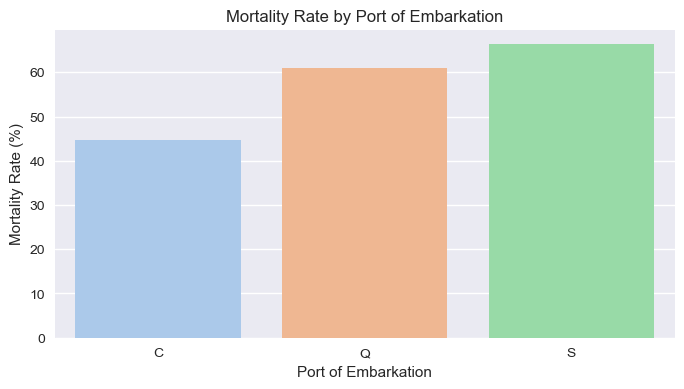

In [103]:
# Calculate the mortality rate with respect to the embarked port
mortality_rate_embarked = titanic.groupby('Embarked')['Survived'].agg(
    not_survived='sum',
    total='count',
    mortality_rate=lambda x: round((1 - x.mean()) * 100, 2)
)

print(mortality_rate_embarked)

# Plot the mortality rate according to the embarked ports
plt.figure(figsize=(8, 4))
sns.barplot(x=mortality_rate_embarked.index, y=mortality_rate_embarked['mortality_rate'], palette='pastel')
plt.title('Mortality Rate by Port of Embarkation')
plt.ylabel('Mortality Rate (%)')
plt.xlabel('Port of Embarkation')
plt.show()


        not_survived  total  mortality_rate
Pclass                                     
1                136    216           37.04
2                 87    184           52.72
3                119    491           75.76


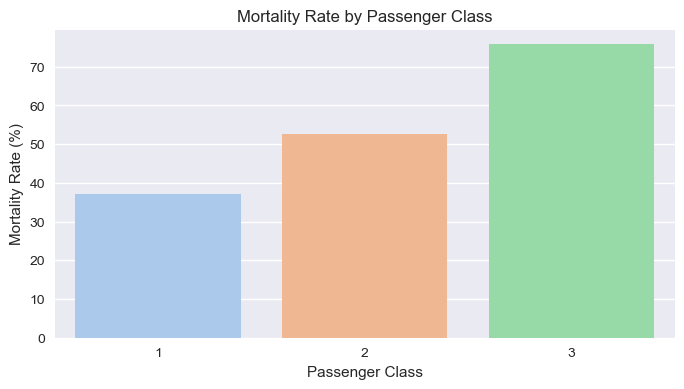

In [104]:

# Calculate the mortality rate with respect to the passenger class
mortality_rate_pclass = titanic.groupby('Pclass')['Survived'].agg(
    not_survived='sum',
    total='count',
    mortality_rate=lambda x: round((1 - x.mean()) * 100, 2)
)

print(mortality_rate_pclass)    

# Plot the mortality rate according to the passenger class
plt.figure(figsize=(8, 4))
sns.barplot(x=mortality_rate_pclass.index, y=mortality_rate_pclass['mortality_rate'], palette='pastel')
plt.title('Mortality Rate by Passenger Class')
plt.ylabel('Mortality Rate (%)')
plt.xlabel('Passenger Class')
plt.show()

In [105]:
# Calculate the mortality rate with respect to the sex of the passengers
mortality_rate_sex = titanic.groupby('Sex')['Survived'].agg(
    not_survived=lambda x: (1 - x).sum(),
    total='count',
    mortality_rate=lambda x: round((1 - x.mean()) * 100, 2)
)

print(mortality_rate_sex)


        not_survived  total  mortality_rate
Sex                                        
female            81    314           25.80
male             468    577           81.11


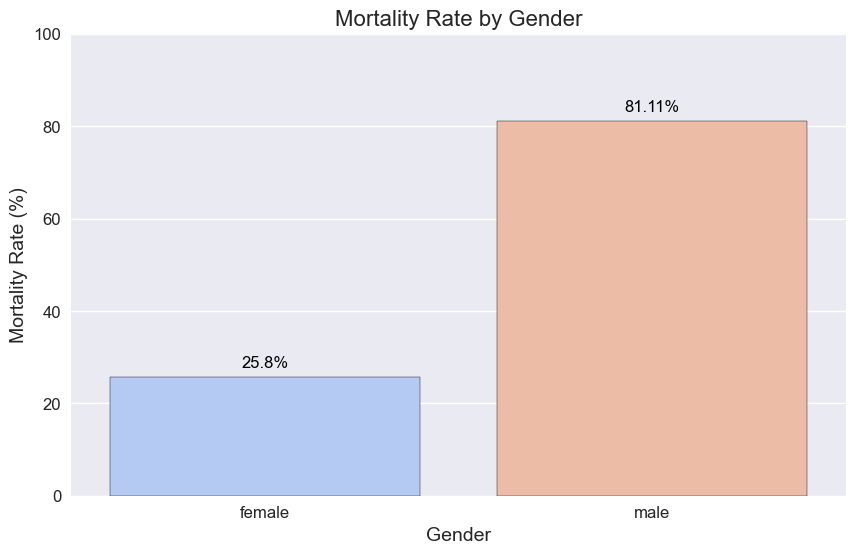

In [106]:
# Plot the mortality rate according to the sex of the passengers
plt.figure(figsize=(10, 6))
sns.barplot(x=mortality_rate_sex.index, y=mortality_rate_sex['mortality_rate'], palette='coolwarm', edgecolor='black')
plt.title('Mortality Rate by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Mortality Rate (%)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 100)
for index, value in enumerate(mortality_rate_sex['mortality_rate']):
    plt.text(index, value + 2, f'{value}%', ha='center', fontsize=12, color='black')
plt.show()

       not_survived  total  mortality_rate
SibSp                                     
0               398    608           65.46
1                97    209           46.41
2                15     28           53.57
3                12     16           75.00
4                15     18           83.33
5                 5      5          100.00
8                 7      7          100.00


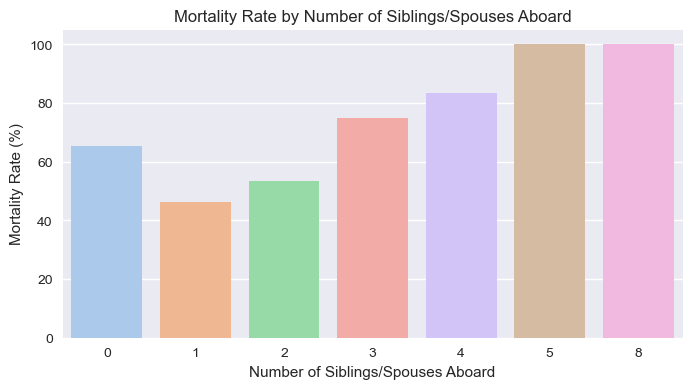

In [107]:
# Calculate the mortality rate with respect to the number of siblings/spouses aboard the Titanic
mortality_rate_siblings = titanic.groupby('SibSp')['Survived'].agg(
    not_survived=lambda x: (1 - x).sum(),
    total='count',
    mortality_rate=lambda x: round((1 - x.mean()) * 100, 2)
)

print(mortality_rate_siblings)

# Plot the mortality rate according to the number of siblings/spouses aboard the Titanic
plt.figure(figsize=(8, 4))
sns.barplot(x=mortality_rate_siblings.index, y=mortality_rate_siblings['mortality_rate'], palette='pastel')
plt.title('Mortality Rate by Number of Siblings/Spouses Aboard')
plt.ylabel('Mortality Rate (%)')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.show()

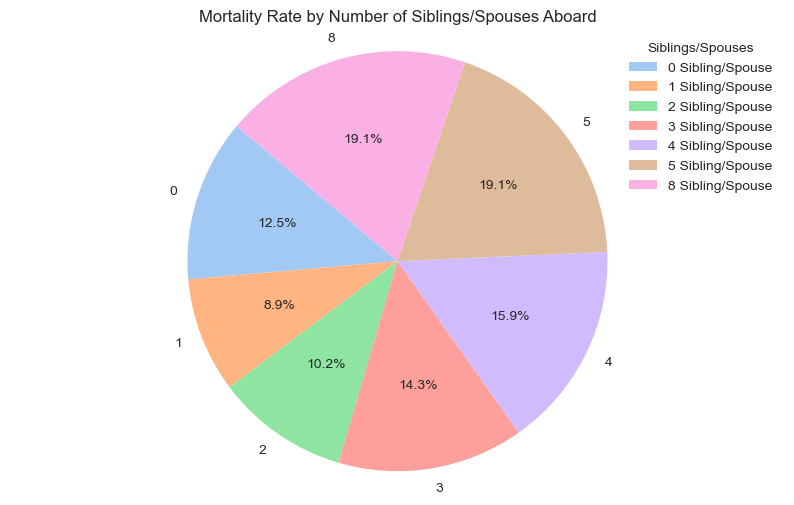

In [108]:
# Plot pie chart of the mortality rate with respect to the number of siblings/spouses aboard the Titanic
labels = mortality_rate_siblings.index
sizes = mortality_rate_siblings['mortality_rate']
colors = sns.color_palette('pastel')[0:len(labels)]  # Use pastel colors

plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Mortality Rate by Number of Siblings/Spouses Aboard')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.legend(title="Siblings/Spouses", loc="best", labels=[f'{label} Sibling/Spouse' for label in labels])
plt.show()

       not_survived  total  mortality_rate
Parch                                     
0               445    678           65.63
1                53    118           44.92
2                40     80           50.00
3                 2      5           40.00
4                 4      4          100.00
5                 4      5           80.00
6                 1      1          100.00


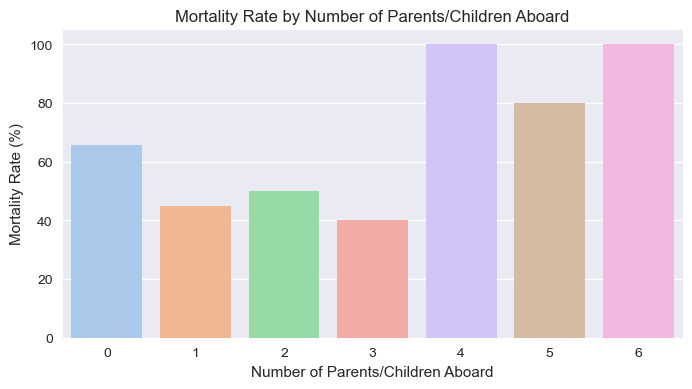

In [109]:
# Calculate the mortality rate with respect to the number of parents/children aboard the Titanic
mortality_rate_parents = titanic.groupby('Parch')['Survived'].agg(
    not_survived=lambda x: (1 - x).sum(),
    total='count',
    mortality_rate=lambda x: round((1 - x.mean()) * 100, 2)
)

print(mortality_rate_parents)

# Plot the mortality rate according to the number of parents/children aboard the Titanic
plt.figure(figsize=(8, 4))
sns.barplot(x=mortality_rate_parents.index, y=mortality_rate_parents['mortality_rate'], palette='pastel')
plt.title('Mortality Rate by Number of Parents/Children Aboard')
plt.ylabel('Mortality Rate (%)')
plt.xlabel('Number of Parents/Children Aboard')
plt.show()


In [110]:
# Filter the dataset to find rows where Parch is 9
parch_9_rows = titanic[titanic['Parch'] == 9]
pprint(parch_9_rows)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


       not_survived  total  mortality_rate
Parch                                     
0               445    678           65.63
1                53    118           44.92
2                40     80           50.00
3                 2      5           40.00
4                 4      4          100.00
5                 4      5           80.00
6                 1      1          100.00


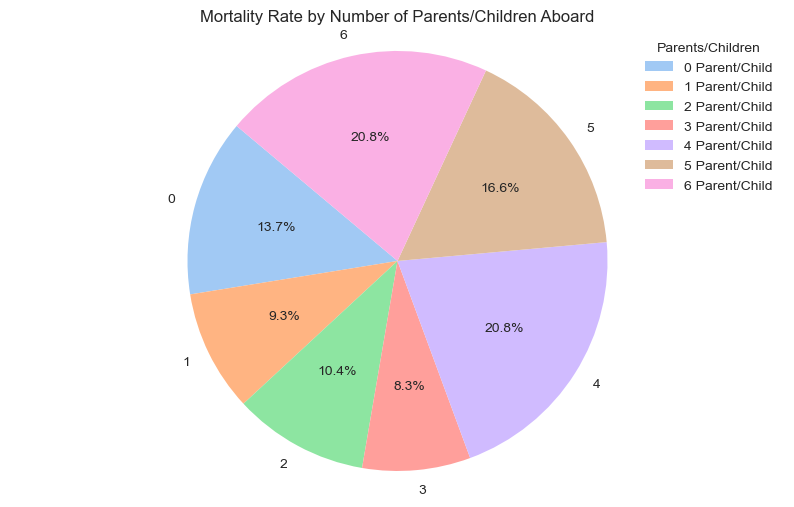

In [112]:
# Fill missing values in 'Parch' column with 0.0 (float)
titanic['Parch'].fillna(0.0, inplace=True)

# Calculate the mortality rate with respect to the number of parents/children aboard the Titanic
mortality_rate_parents = titanic.groupby('Parch')['Survived'].agg(
    not_survived=lambda x: (1 - x).sum(),
    total='count',
    mortality_rate=lambda x: round((1 - x.mean()) * 100, 2)
)

print(mortality_rate_parents)

# Plot the mortality rate according to the number of parents/children aboard the Titanic as a pie chart
labels = mortality_rate_parents.index
sizes = mortality_rate_parents['mortality_rate']
colors = sns.color_palette('pastel')[0:len(labels)]  # Use pastel colors

plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Mortality Rate by Number of Parents/Children Aboard')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.legend(title="Parents/Children", loc="best", labels=[f'{label} Parent/Child' for label in labels])
plt.show()

        not_survived  total  mortality_rate
Sex                                        
female            81    314           25.80
male             468    577           81.11


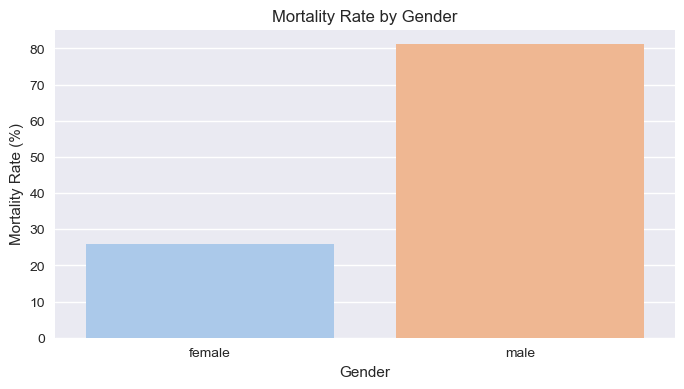

In [113]:
# claculate the mortality rate with respect to the gender
mortality_rate_gender = titanic.groupby('Sex')['Survived'].agg(
    not_survived=lambda x: (1 - x).sum(),
    total='count',
    mortality_rate=lambda x: round((1 - x.mean()) * 100, 2)
)

print(mortality_rate_gender)

# Plot the mortality rate according to the gender   
plt.figure(figsize=(8, 4))
sns.barplot(x=mortality_rate_gender.index, y=mortality_rate_gender['mortality_rate'], palette='pastel')
plt.title('Mortality Rate by Gender')
plt.ylabel('Mortality Rate (%)')
plt.xlabel('Gender')
plt.show()


        survivors  total  survival_rate
Pclass                                 
1             136    216          62.96
2              87    184          47.28
3             119    491          24.24


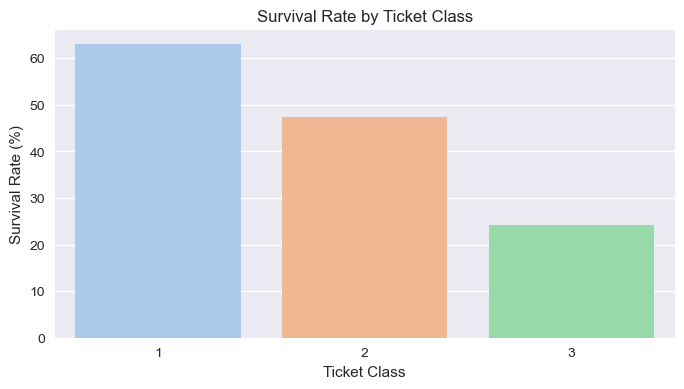

In [114]:
# Group by 'Pclass' and calculate the survival rate for each class
ticket_grade_survival_rate = titanic.groupby('Pclass')['Survived'].agg(
    survivors='sum',
    total='count',
    survival_rate=lambda x: round((x.sum() / x.count()) * 100, 2)
)

print(ticket_grade_survival_rate)

# Plot the survival rate by ticket class
plt.figure(figsize=(8, 4))
sns.barplot(x=ticket_grade_survival_rate.index, y=ticket_grade_survival_rate['survival_rate'], palette='pastel')
plt.title('Survival Rate by Ticket Class')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Ticket Class')
plt.show()


        not_survived  total  mortality_rate
Pclass                                     
1                 80    216           37.04
2                 97    184           52.72
3                372    491           75.76


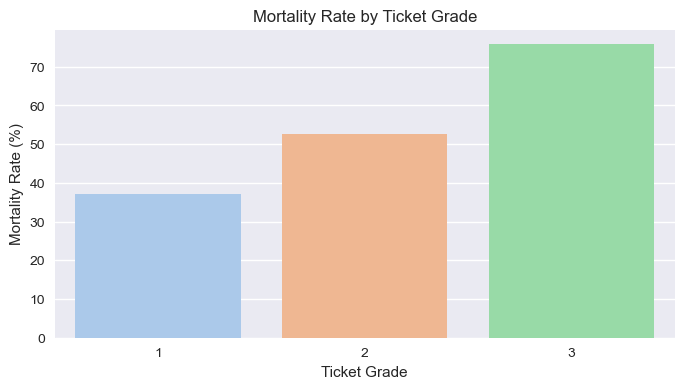

In [115]:
# Group by 'Pclass' and calculate the mortality rate for each class
mortality_rate_pclass = titanic.groupby('Pclass')['Survived'].agg(
    not_survived=lambda x: (1 - x).sum(),
    total='count',
    mortality_rate=lambda x: round((1 - x.mean()) * 100, 2)
)
print(mortality_rate_pclass)
    

# Plot the mortality rate by ticket grade
plt.figure(figsize=(8, 4))
sns.barplot(x=mortality_rate_pclass.index, y=mortality_rate_pclass['mortality_rate'], palette='pastel')
plt.title('Mortality Rate by Ticket Grade')
plt.ylabel('Mortality Rate (%)')
plt.xlabel('Ticket Grade')
plt.show()

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


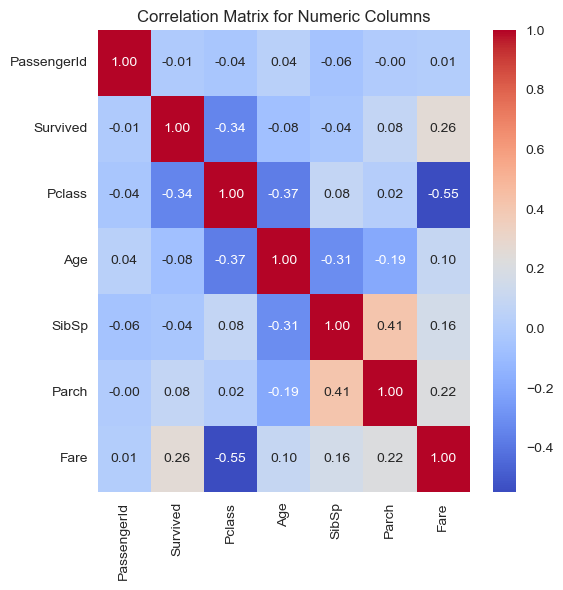

In [116]:
# Calculate the correlation matrix for the numeric columns
correlation_matrix = titanic[numerical_cols].corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numeric Columns')
plt.show()

In [117]:
# Name column in the Titanic dataset contains the name of the passengers.
# Display the first few rows of the 'Name' column in the Titanic dataset.
print(titanic['Name'].head())

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object


In [118]:
# Extract the title from the 'Name' column
titanic['Title'] = titanic['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

# Display the first few rows to verify the extraction
print(titanic[['Name', 'Title']].head())

                                                Name Title
0                            Braund, Mr. Owen Harris    Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
2                             Heikkinen, Miss. Laina  Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
4                           Allen, Mr. William Henry    Mr


In [119]:
# Count the number of people by title using the `value_counts` method on the 'Title' column.
# The `value_counts` method returns the frequency of each unique value in the column.
title_counts = titanic['Title'].value_counts()
print(title_counts)

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64


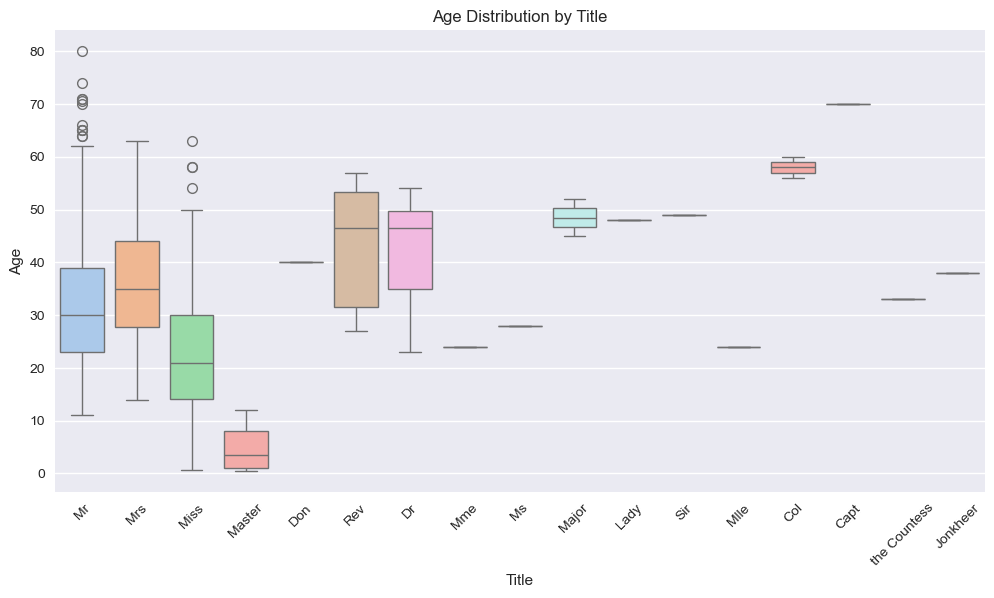

In [120]:
# Ensure the Title column is created
# Extract the title from the 'Name' column in the Titanic dataset and create a new column 'Title' 
# to store the extracted titles using the `str.split` method with the parameters `', '` and `'.'`
# to split the names and extract the titles.
# The `expand=True` parameter is used to return the split strings as separate columns in a DataFrame.
if 'Title' not in titanic.columns:
	titanic['Title'] = titanic['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Title', y='Age', data=titanic, palette='pastel')
plt.title('Age Distribution by Title')
plt.xticks(rotation=45)
plt.show()

              survived  not_survived  total
Title                                      
Capt                 0             1      1
Col                  1             1      2
Don                  0             1      1
Dr                   3             4      7
Jonkheer             0             1      1
Lady                 1             0      1
Major                1             1      2
Master              23            17     40
Miss               127            55    182
Mlle                 2             0      2
Mme                  1             0      1
Mr                  81           436    517
Mrs                 99            26    125
Ms                   1             0      1
Rev                  0             6      6
Sir                  1             0      1
the Countess         1             0      1


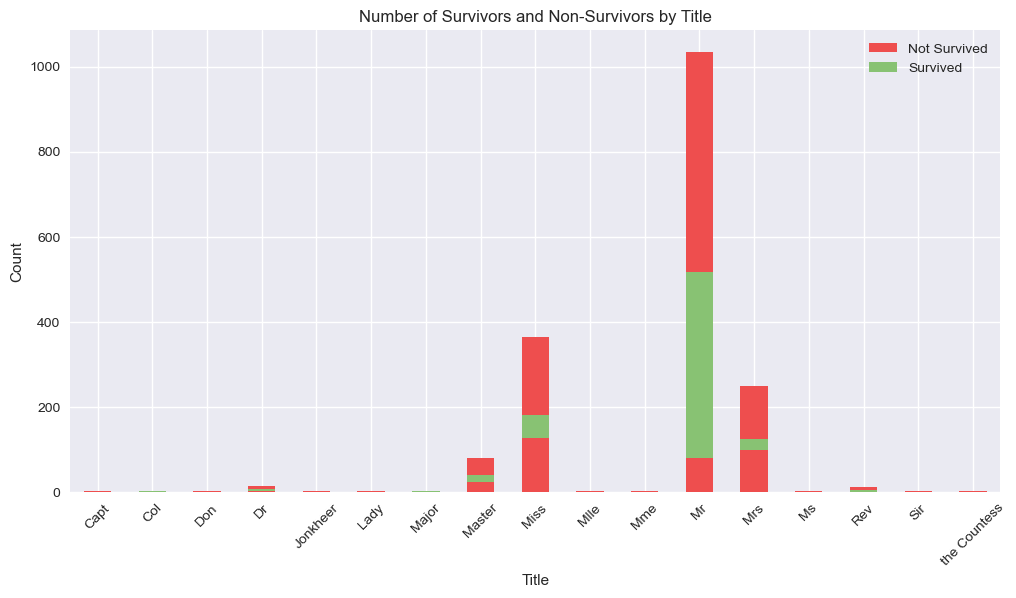

In [121]:
# Group by 'Title' and calculate the number of survivors and non-survivors
# The `agg` method is used to calculate the number of survivors and non-survivors for each title.
# The results are stored in a new DataFrame `survival_by_title`.
survival_by_title = titanic.groupby('Title')['Survived'].agg(
    survived='sum',
    not_survived=lambda x: (1 - x).sum(),
    total='count'
)

# Display the results
print(survival_by_title)
# Plot the number of survivors and non-survivors by title
survival_by_title.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#EE4E4E', '#88C273'])
plt.title('Number of Survivors and Non-Survivors by Title')
plt.ylabel('Count')
plt.xlabel('Title')
plt.xticks(rotation=45)
plt.legend(['Not Survived', 'Survived'])
plt.show()

              not_survived  total  mortality_rate
Title                                            
Capt                     1      1          100.00
Col                      1      2           50.00
Don                      1      1          100.00
Dr                       4      7           57.14
Jonkheer                 1      1          100.00
Lady                     0      1            0.00
Major                    1      2           50.00
Master                  17     40           42.50
Miss                    55    182           30.22
Mlle                     0      2            0.00
Mme                      0      1            0.00
Mr                     436    517           84.33
Mrs                     26    125           20.80
Ms                       0      1            0.00
Rev                      6      6          100.00
Sir                      0      1            0.00
the Countess             0      1            0.00


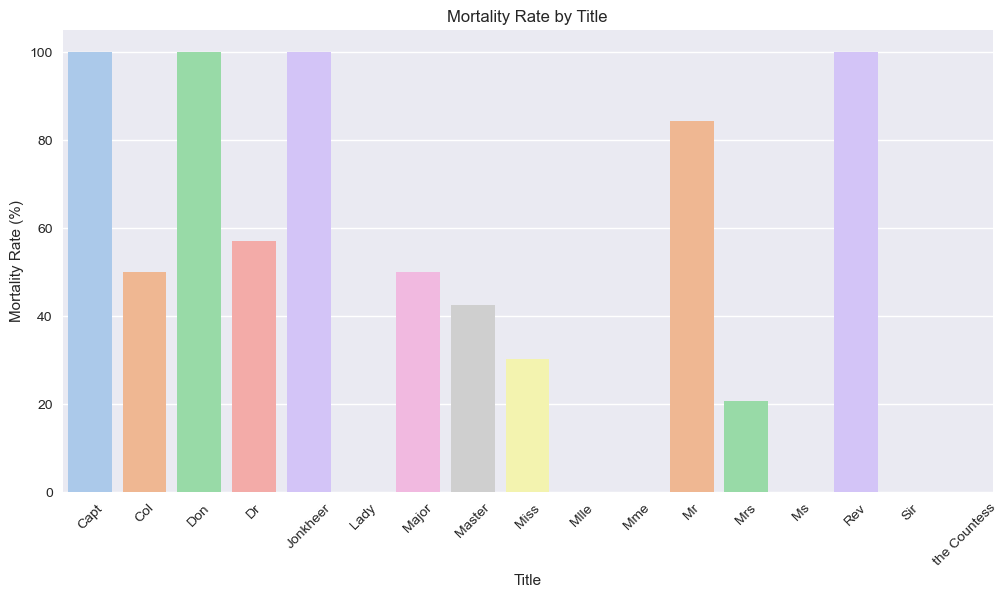

In [122]:
# Calculate the mortality rate with respect to the title
# The `agg` method is used to calculate the number of non-survivors, total passengers, and mortality rate for each title.
# The results are stored in a new DataFrame `mortality_rate_title`.
mortality_rate_title = titanic.groupby('Title')['Survived'].agg(
    not_survived=lambda x: (1 - x).sum(),
    total='count',
    mortality_rate=lambda x: round((1 - x.mean()) * 100, 2)
)

print(mortality_rate_title)

# Plot the mortality rate according to the title
plt.figure(figsize=(12, 6))
sns.barplot(x=mortality_rate_title.index, y=mortality_rate_title['mortality_rate'], palette='pastel')
plt.title('Mortality Rate by Title')
plt.ylabel('Mortality Rate (%)')
plt.xlabel('Title')
plt.xticks(rotation=45)
plt.show()

These results suggest that titles associated with higher social status or specific roles (e.g., Capt, Don, Jonkheer, Rev) had higher mortality rates, while titles associated with women (e.g., Mrs, Miss) generally had lower mortality rates. This could be due to the "women and children first" policy during the evacuation of the Titanic.


In [124]:
# Calculate the average age for each title
# The `groupby` method is used to group the data by the 'Title' column,
# and the `mean` method is used to calculate the average age for each title.
# The results are stored in a new DataFrame `average_age_by_title`.
average_age_by_title = titanic.groupby('Title')['Age'].mean()

# Fill missing age values with the average age for the corresponding title
titanic['Age'] = titanic.apply(lambda row: average_age_by_title[row['Title']] if pd.isnull(row['Age']) else row['Age'], axis=1)

# Display the first few rows to verify the changes
print(titanic[['Title', 'Age']].head(10))

    Title       Age
0      Mr  22.00000
1     Mrs  38.00000
2    Miss  26.00000
3     Mrs  35.00000
4      Mr  35.00000
5      Mr  32.36809
6      Mr  54.00000
7  Master   2.00000
8     Mrs  27.00000
9     Mrs  14.00000


In [125]:
# Calculate the correction value for the 'Age' column by taking the mean of the 'Age' column.
# The `mean` method is used to calculate the mean of the 'Age' column.
# The result is stored in the variable `correction_value`.
correction_value = titanic['Age'].mean()
print(f"The correction value is: {correction_value}")


The correction value is: 29.754658768465667


In [126]:
# Print the number of missing values in the daataset
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [127]:
# Print the number of missing values in the 'Age' column of the Titanic dataset
titanic['Age'].isnull().sum()

0

In [128]:
# Fill missing values in 'Embarked' column with the most frequent value (mode)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# Verify that there are no missing values in the 'Embarked' column
print(titanic['Embarked'].isnull().sum())

0


In [131]:
# Print the number of missing values in the daataset after filling missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [132]:
# Drop the 'Cabin' column from the dataset  
titanic.drop('Cabin', axis=1, inplace=True) 

# Verify that the 'Cabin' column has been dropped
# 'Cabin' column should not be in the list of columns anymore
print(titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Title'],
      dtype='object')


In [133]:
# Check for missing values in the dataset after dropping the 'Cabin' column
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

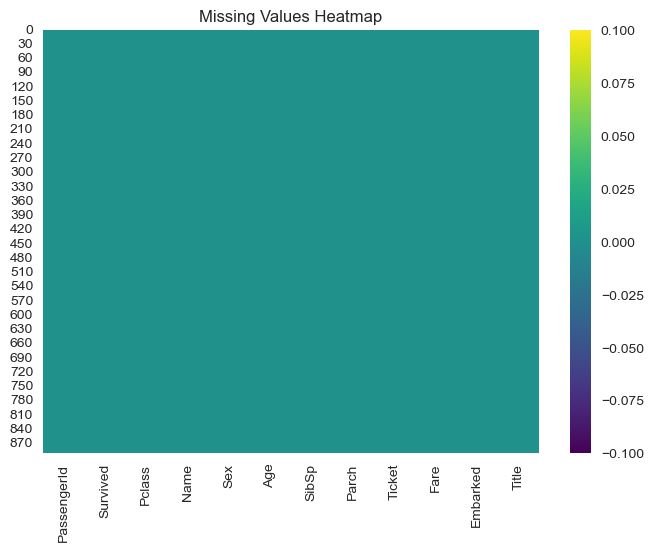

In [134]:
# Plot the missing values in the dataset using a seaborn heatmap
sns.heatmap(titanic.isnull(), cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap') 
plt.show()

In [135]:
# create a new column 'FamilySize' by adding the 'SibSp' and 'Parch' columns
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1 # Add 1 to include the passenger themselves

# Display the first few rows to verify the new column
print(titanic[['FamilySize', 'SibSp', 'Parch']].head(10))   
    

   FamilySize  SibSp  Parch
0           2      1      0
1           2      1      0
2           1      0      0
3           2      1      0
4           1      0      0
5           1      0      0
6           1      0      0
7           5      3      1
8           3      0      2
9           2      1      0


In [136]:
# create a new column 'IsAlone' to indicate if the passenger is traveling alone
titanic['IsAlone'] = titanic['FamilySize'] == 1 # True if the passenger is alone, False otherwise

# Display the first few rows to verify the new column       
print(titanic[['IsAlone', 'FamilySize']].head(10))  

   IsAlone  FamilySize
0    False           2
1    False           2
2     True           1
3    False           2
4     True           1
5     True           1
6     True           1
7    False           5
8    False           3
9    False           2


In [137]:
#  create a new column 'FarePerPerson' by dividing the 'Fare' column by the 'FamilySize' column
titanic['FarePerPerson'] = titanic['Fare'] / titanic['FamilySize']

# Display the first few rows to verify the new column
print(titanic[['FarePerPerson', 'Fare', 'FamilySize']].head(10))

   FarePerPerson     Fare  FamilySize
0        3.62500   7.2500           2
1       35.64165  71.2833           2
2        7.92500   7.9250           1
3       26.55000  53.1000           2
4        8.05000   8.0500           1
5        8.45830   8.4583           1
6       51.86250  51.8625           1
7        4.21500  21.0750           5
8        3.71110  11.1333           3
9       15.03540  30.0708           2


In [138]:
#  create a new column 'AgeGroup' to categorize passengers into age groups
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=[0, 18, 30, 50, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])

# Display the first few rows to verify the new column
print(titanic[['AgeGroup', 'Age']].head(10))    

      AgeGroup       Age
0  Young Adult  22.00000
1        Adult  38.00000
2  Young Adult  26.00000
3        Adult  35.00000
4        Adult  35.00000
5        Adult  32.36809
6       Senior  54.00000
7        Child   2.00000
8  Young Adult  27.00000
9        Child  14.00000


In [139]:
# create a new column 'FareGroup' to categorize passengers into fare groups
titanic['FareGroup'] = pd.cut(titanic['Fare'], bins=[0, 10, 20, 30, 100], labels=['Low', 'Medium', 'High', 'Very High'])

# Display the first few rows to verify the new column
print(titanic[['FareGroup', 'Fare']].head(10))

   FareGroup     Fare
0        Low   7.2500
1  Very High  71.2833
2        Low   7.9250
3  Very High  53.1000
4        Low   8.0500
5        Low   8.4583
6  Very High  51.8625
7       High  21.0750
8     Medium  11.1333
9  Very High  30.0708


In [140]:
# Drop the 'Name', 'Ticket' and 'PassengerId' columns from the dataset
titanic.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True) 

# Display the first few rows to verify the changes
titanic.head(10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FarePerPerson,AgeGroup,FareGroup
0,0,3,male,22.00000,1,0,7.2500,S,Mr,2,False,3.62500,Young Adult,Low
1,1,1,female,38.00000,1,0,71.2833,C,Mrs,2,False,35.64165,Adult,Very High
2,1,3,female,26.00000,0,0,7.9250,S,Miss,1,True,7.92500,Young Adult,Low
3,1,1,female,35.00000,1,0,53.1000,S,Mrs,2,False,26.55000,Adult,Very High
4,0,3,male,35.00000,0,0,8.0500,S,Mr,1,True,8.05000,Adult,Low
5,0,3,male,32.36809,0,0,8.4583,Q,Mr,1,True,8.45830,Adult,Low
6,0,1,male,54.00000,0,0,51.8625,S,Mr,1,True,51.86250,Senior,Very High
7,0,3,male,2.00000,3,1,21.0750,S,Master,5,False,4.21500,Child,High
8,1,3,female,27.00000,0,2,11.1333,S,Mrs,3,False,3.71110,Young Adult,Medium
9,1,2,female,14.00000,1,0,30.0708,C,Mrs,2,False,15.03540,Child,Very High


In [142]:
# The LabelEncoder object is used to encode categorical columns using label encoding technique.
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['Sex', 'Embarked', 'Title', 'AgeGroup', 'FareGroup', 'IsAlone']

# Apply label encoding to each categorical column
for col in categorical_cols:
    titanic[col] = label_encoder.fit_transform(titanic[col])

# Display the first few rows to verify the changes
titanic.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FarePerPerson,AgeGroup,FareGroup
0,0,3,1,22.000000,1,0,7.2500,2,11,2,0,3.625000,3,1
1,1,1,0,38.000000,1,0,71.2833,0,12,2,0,35.641650,0,3
2,1,3,0,26.000000,0,0,7.9250,2,8,1,1,7.925000,3,1
3,1,1,0,35.000000,1,0,53.1000,2,12,2,0,26.550000,0,3
4,0,3,1,35.000000,0,0,8.0500,2,11,1,1,8.050000,0,1
5,0,3,1,32.368090,0,0,8.4583,1,11,1,1,8.458300,0,1
6,0,1,1,54.000000,0,0,51.8625,2,11,1,1,51.862500,2,3
7,0,3,1,2.000000,3,1,21.0750,2,7,5,0,4.215000,1,0
8,1,3,0,27.000000,0,2,11.1333,2,12,3,0,3.711100,3,2
9,1,2,0,14.000000,1,0,30.0708,0,12,2,0,15.035400,1,3


In [143]:
#   Split the data into features (X) and target (y) variables
X = titanic.drop('Survived', axis=1)
y = titanic['Survived'] 

# Split the data into training and testing sets using 20% of the data for testing
# Set random state for reproducibility  
# Stratify the split based on the 'Pclass' column to ensure that the distribution of classes is the same in both the training and testing sets

strat_train_set, strat_test_set = train_test_split(titanic, test_size=0.2, stratify=titanic['Pclass'], random_state=42)

# Display the shape of the training and testing sets 

strat_train_set.to_csv('../data/interim//strat_train.csv', index=False, header=True, sep=',', encoding='utf-8')
strat_test_set.to_csv('../data/interim/strat_test.csv', index=False, header=True, sep=',', encoding='utf-8')

# Display the shape of the training and testing sets 
print("Training set shape:", strat_train_set.shape)
print("Testing set shape:", strat_test_set.shape)

# Display the value counts of the 'Pclass' column in the original dataset
# to verify that the stratified split was successful
titanic['Pclass'].value_counts()    
# Normalize the value counts to get the proportions of each class in the original dataset
titanic['Pclass'].value_counts(normalize=True)  

# Display the value counts of the 'Pclass' column in the training and testing sets  
# to verify that the stratified split was successful            
strat_train_set['Pclass'].value_counts(normalize=True)
strat_test_set['Pclass'].value_counts(normalize=True)


Training set shape: (712, 14)
Testing set shape: (179, 14)


Pclass
3    0.553073
1    0.240223
2    0.206704
Name: proportion, dtype: float64

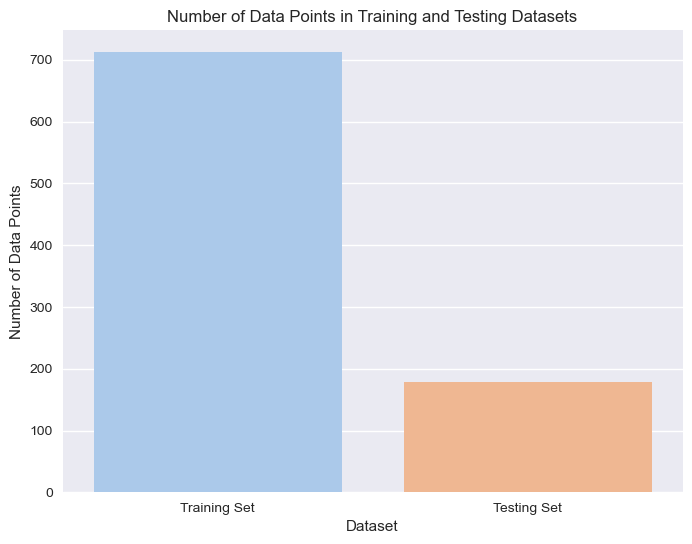

In [144]:
# Get the number of data points in each dataset
num_data_points_train = strat_train_set.shape[0]
num_data_points_test = strat_test_set.shape[0]

# Create a DataFrame to store the dataset names and their corresponding number of data points
dataset_shapes = pd.DataFrame({
    'Dataset': ['Training Set', 'Testing Set'],
    'Number of Data Points': [num_data_points_train, num_data_points_test]
})

# Plot the shapes of the datasets
plt.figure(figsize=(8, 6))
sns.barplot(x='Dataset', y='Number of Data Points', data=dataset_shapes, palette='pastel')
plt.title('Number of Data Points in Training and Testing Datasets')
plt.xlabel('Dataset')
plt.ylabel('Number of Data Points')
plt.show()

In [145]:
# Get the number of data points in each dataset
num_data_points_train = strat_train_set.shape[0]
num_data_points_test = strat_test_set.shape[0]

# Sum the number of data points
total_data_points = num_data_points_train + num_data_points_test

print(f"Number of data points in the training dataset: {num_data_points_train}")
print(f"Number of data points in the testing dataset: {num_data_points_test}")
print(f"Total number of data points: {total_data_points}")

Number of data points in the training dataset: 712
Number of data points in the testing dataset: 179
Total number of data points: 891


In [146]:
# Create a copy of the original DataFrame to avoid modifying the original data 
# when making changes to the dataset.  
titanic = strat_train_set.copy()

In [147]:
# Define the numeric columns to be verified and plotted
numeric_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'FarePerPerson']

# Display the list of numeric columns
print(numeric_cols)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'FarePerPerson']


In [148]:
# Check for missing values in the numeric columns
titanic.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Title            0
FamilySize       0
IsAlone          0
FarePerPerson    0
AgeGroup         0
FareGroup        0
dtype: int64

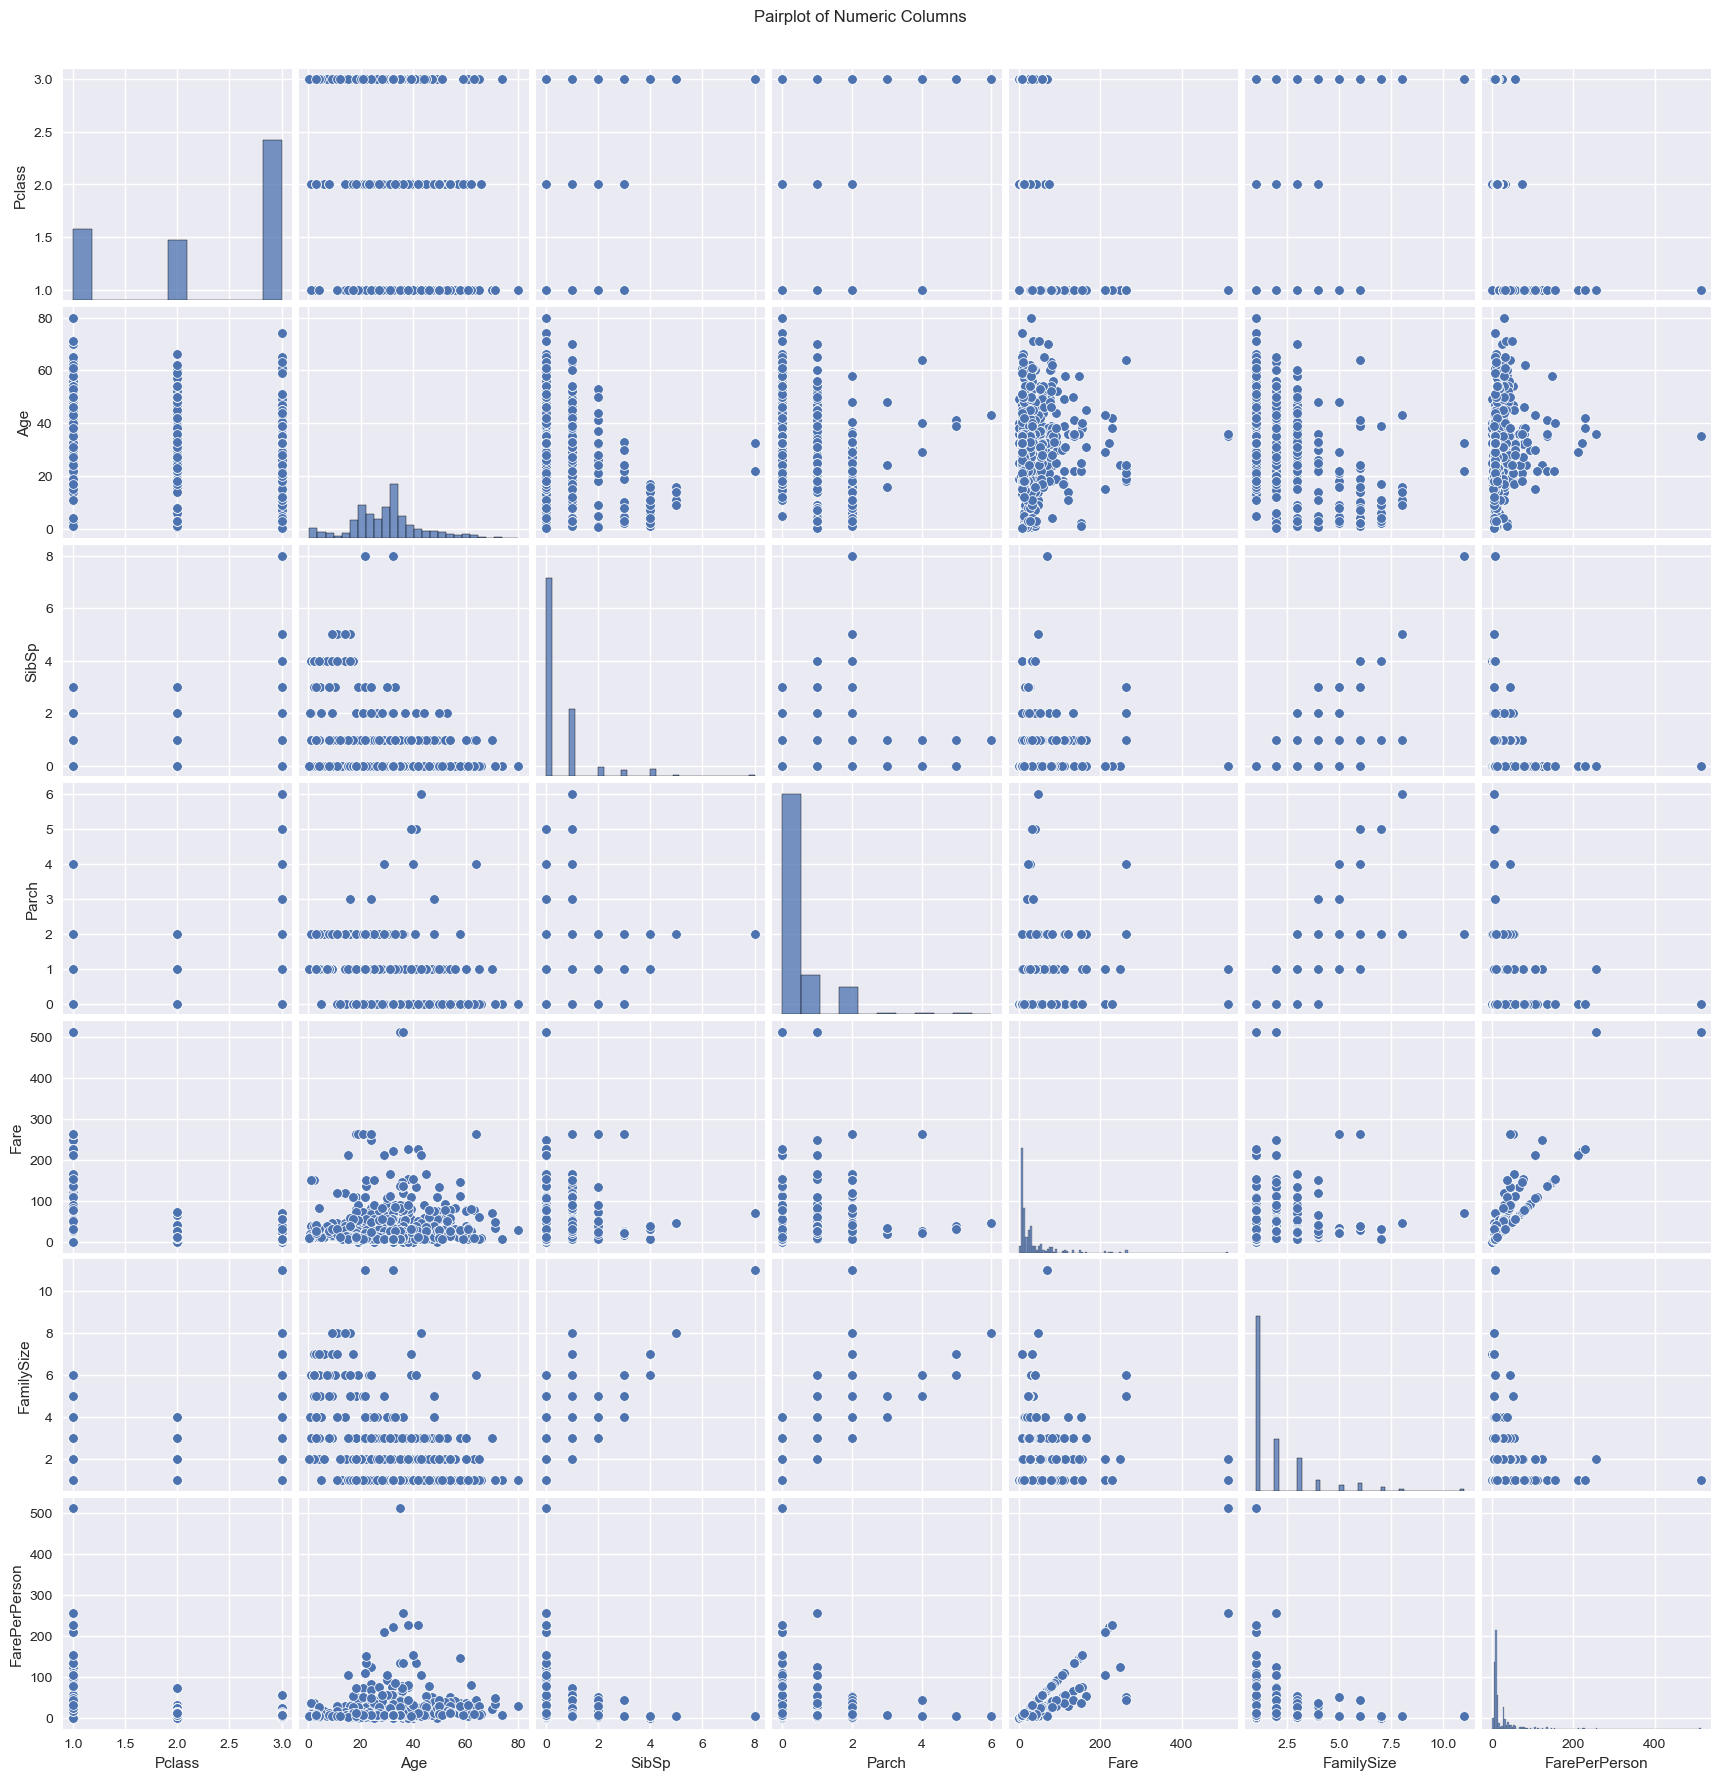

In [149]:
#  Plot a pairplot of the numeric columns in the Titanic dataset using seaborn
sns.pairplot(titanic[numeric_cols])
plt.suptitle('Pairplot of Numeric Columns', y=1.02)
plt.show()

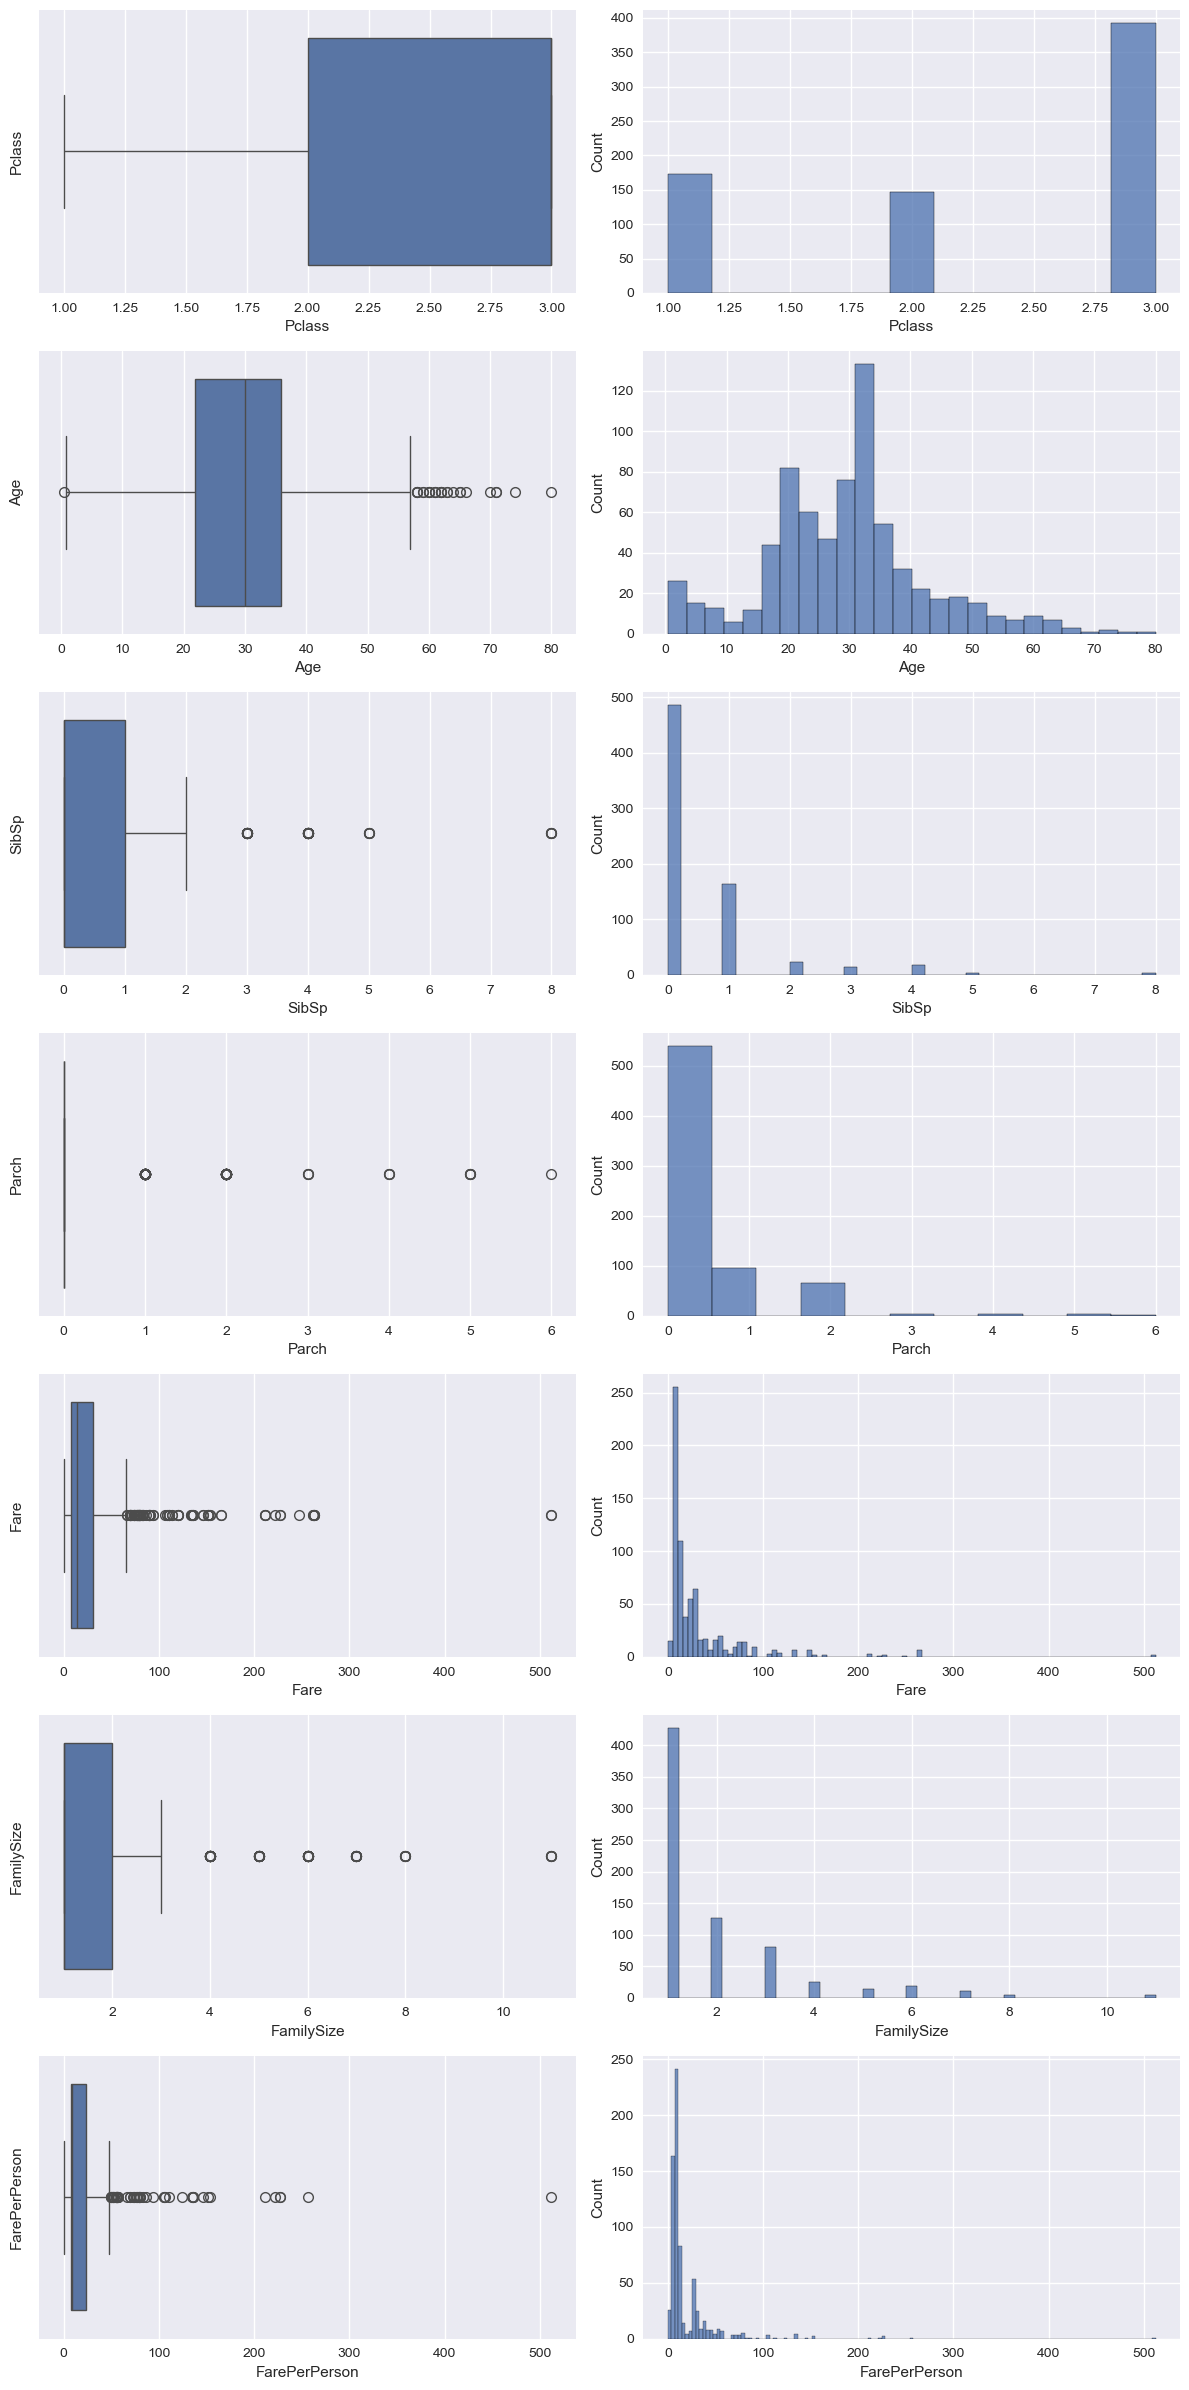

In [150]:
# Define the numeric columns to be verified and plotted
numeric_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'FarePerPerson']

# Define the number of rows and columns for the grid of plots
num_rows = len(numeric_cols)
num_cols = 2

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 24))

# Iterate through the columns and create boxplots and histograms
for i, column in enumerate(numeric_cols):
    # Boxplot
    sns.boxplot(data=titanic.dropna(), x=column, ax=axes[i, 0])
    axes[i, 0].set_ylabel(column)
    
    # Histogram
    sns.histplot(data=titanic, x=column, ax=axes[i, 1], kde=False)
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel('Count')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

In [151]:
# Check for missing values in the categorical columns
titanic_cat = titanic[categorical_cols].isnull().sum()

# Display the missing values in the categorical columns 
print(titanic_cat)

Sex          0
Embarked     0
Title        0
AgeGroup     0
FareGroup    0
IsAlone      0
dtype: int64


In [152]:
# Print the number of missing values in the categorical columns
print(titanic_cat.isna().sum())

0


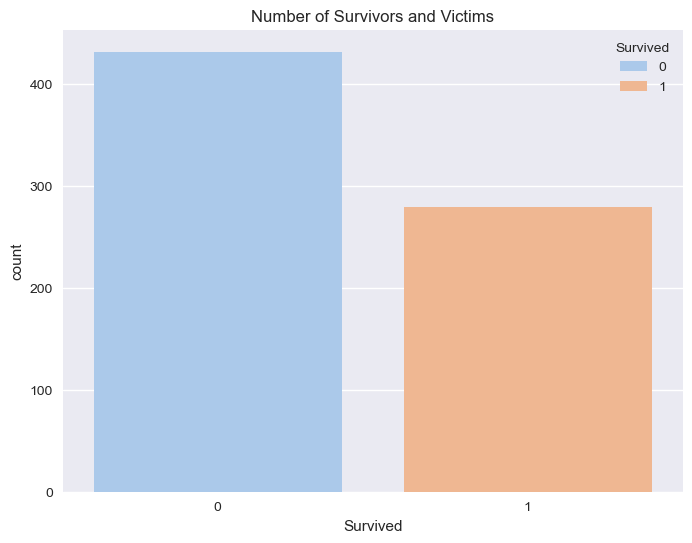

In [153]:
# Plot the number of survivors and victims using a countplot
# change the color palette to 'pastel' and set the hue to 'Survived' to differentiate between survivors and victims.
# Set the title of the plot to 'Number
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=titanic, palette='pastel', hue='Survived')
plt.title('Number of Survivors and Victims')    
plt.show()

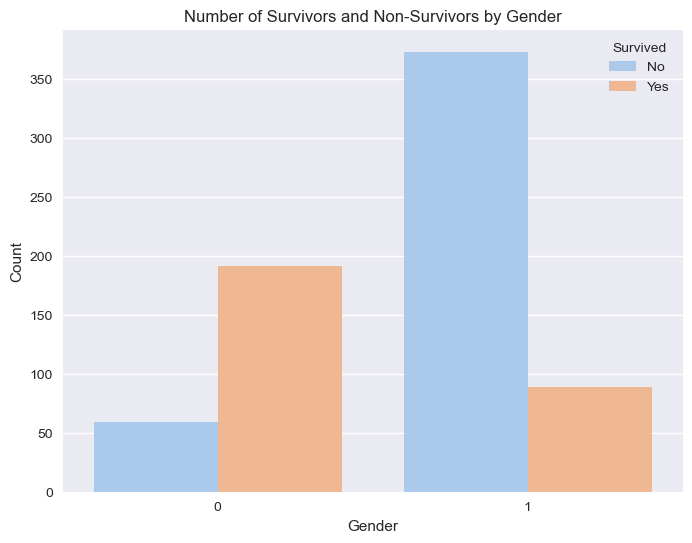

In [154]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=titanic, palette='pastel')
plt.title('Number of Survivors and Non-Survivors by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

          survivors  total  ratio
Embarked                         
0                79    145   0.54
1                26     62   0.42
2               175    505   0.35


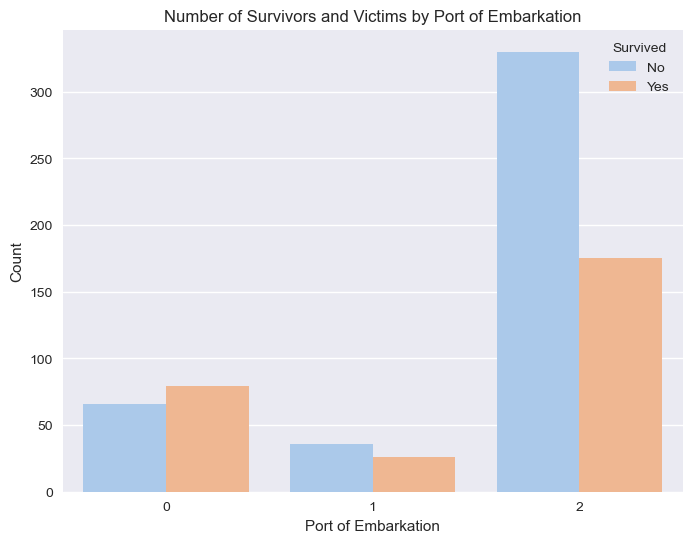

In [155]:
# Analysis for number of survivors
result = titanic.groupby('Embarked')['Survived'].agg(
    survivors='sum',
    total='count',
    ratio=lambda x: round((x.sum() / x.count()),2))

print(result)

# Plot the number of survivors and victims by port of embarkation
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=titanic, palette='pastel')
plt.title('Number of Survivors and Victims by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

        survivors  total  ratio
Pclass                         
1             112    173   0.65
2              67    147   0.46
3             101    392   0.26


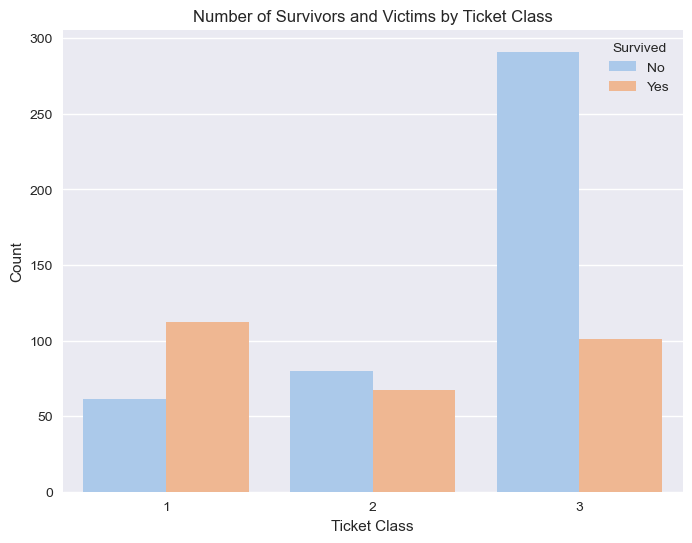

In [ ]:
# Analysis for number of survivors by ticket class (Pclass) 
result = titanic.groupby('Pclass')['Survived'].agg(
    survivors='sum',
    total='count',
    ratio=lambda x: round((x.sum() / x.count()),2))

print(result)

# Plot the number of survivors and victims by ticket class
plt.figure(figsize=(8, 6))    
sns.countplot(x='Pclass', hue='Survived', data=titanic, palette='pastel')
plt.title('Number of Survivors and Victims by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Count')    
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

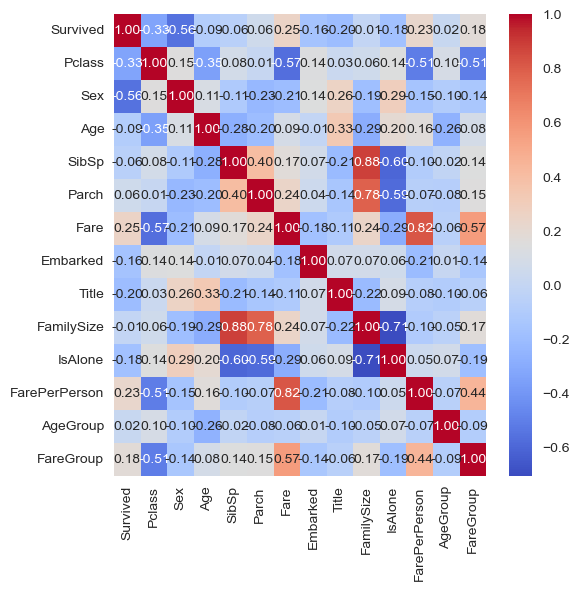

In [157]:
# Calculate the correlation matrix for all columns
correlation_matrix = titanic.corr()

# change the color palette to 'coolwarm' and set the annotation to True to display the correlation values on the heatmap.
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

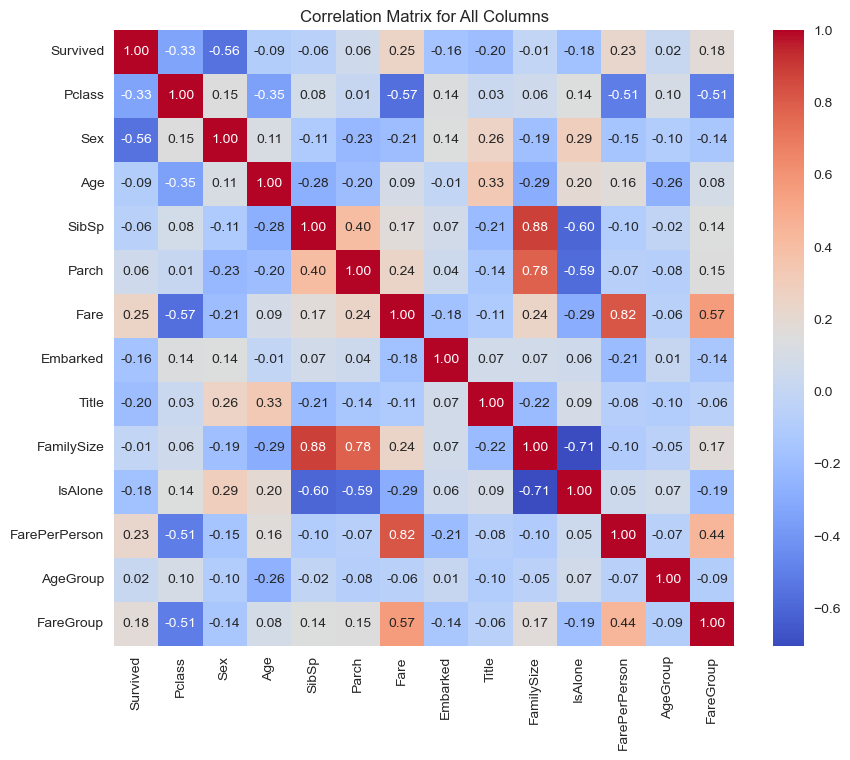

In [159]:
# Calculate the correlation matrix for all columns
correlation_matrix = titanic.corr()

# Display the correlation matrix
# print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for All Columns')
plt.show()

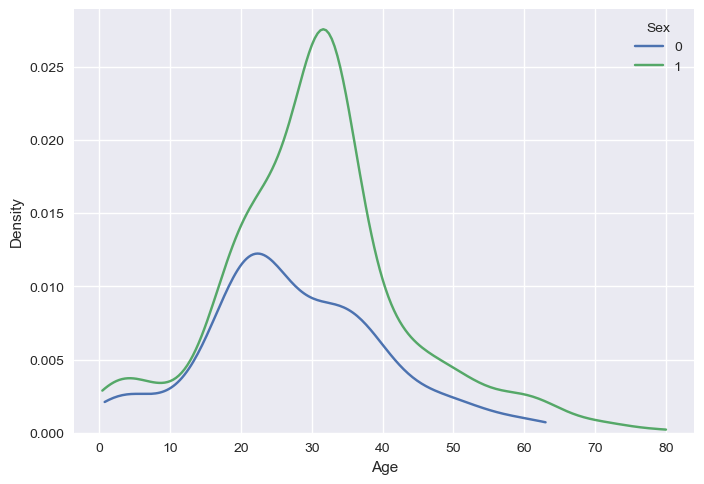

In [160]:
# plot histogram of age between men and women
sns.kdeplot(titanic.dropna(), x='Age', hue='Sex', cut=0)
plt.show()

In [161]:
print(titanic.groupby('Sex')['Age'].agg(['count', 'min', 'mean', 'max']))

     count   min       mean   max
Sex                              
0      250  0.75  27.469580  63.0
1      462  0.42  30.564677  80.0


In [162]:
# change age to int
titanic['Age'] = titanic['Age'].dropna().astype(int)
print(titanic.groupby('Sex')['Age'].agg(['count', 'min', 'mean', 'max']))

     count  min       mean  max
Sex                            
0      250    0  27.320000   63
1      462    0  30.471861   80


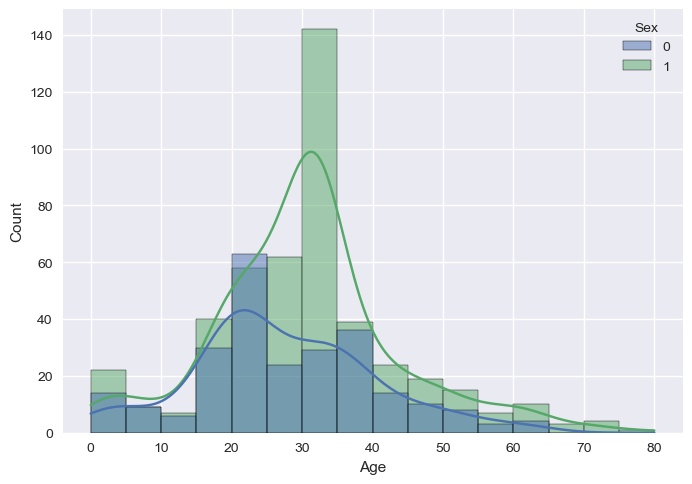

In [163]:
# plot histogram of age between men and women
sns.histplot(titanic.dropna(), x='Age', hue='Sex', kde=True, alpha=0.5, binwidth=5)
plt.show()

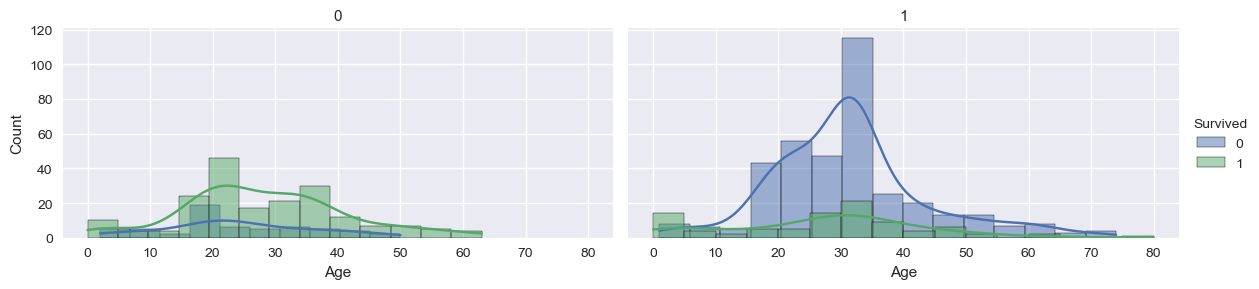

In [164]:
# Create a FacetGrid
g = sns.FacetGrid(titanic, col="Sex", hue="Survived", height=3, aspect=2)

# Plot histograms for 'Age' within each facet
g.map(sns.histplot, "Age", alpha=0.5, kde=True, binwidth=5)

# Add legends and titles
g.add_legend()
g.set_titles("{col_name}")
plt.show()

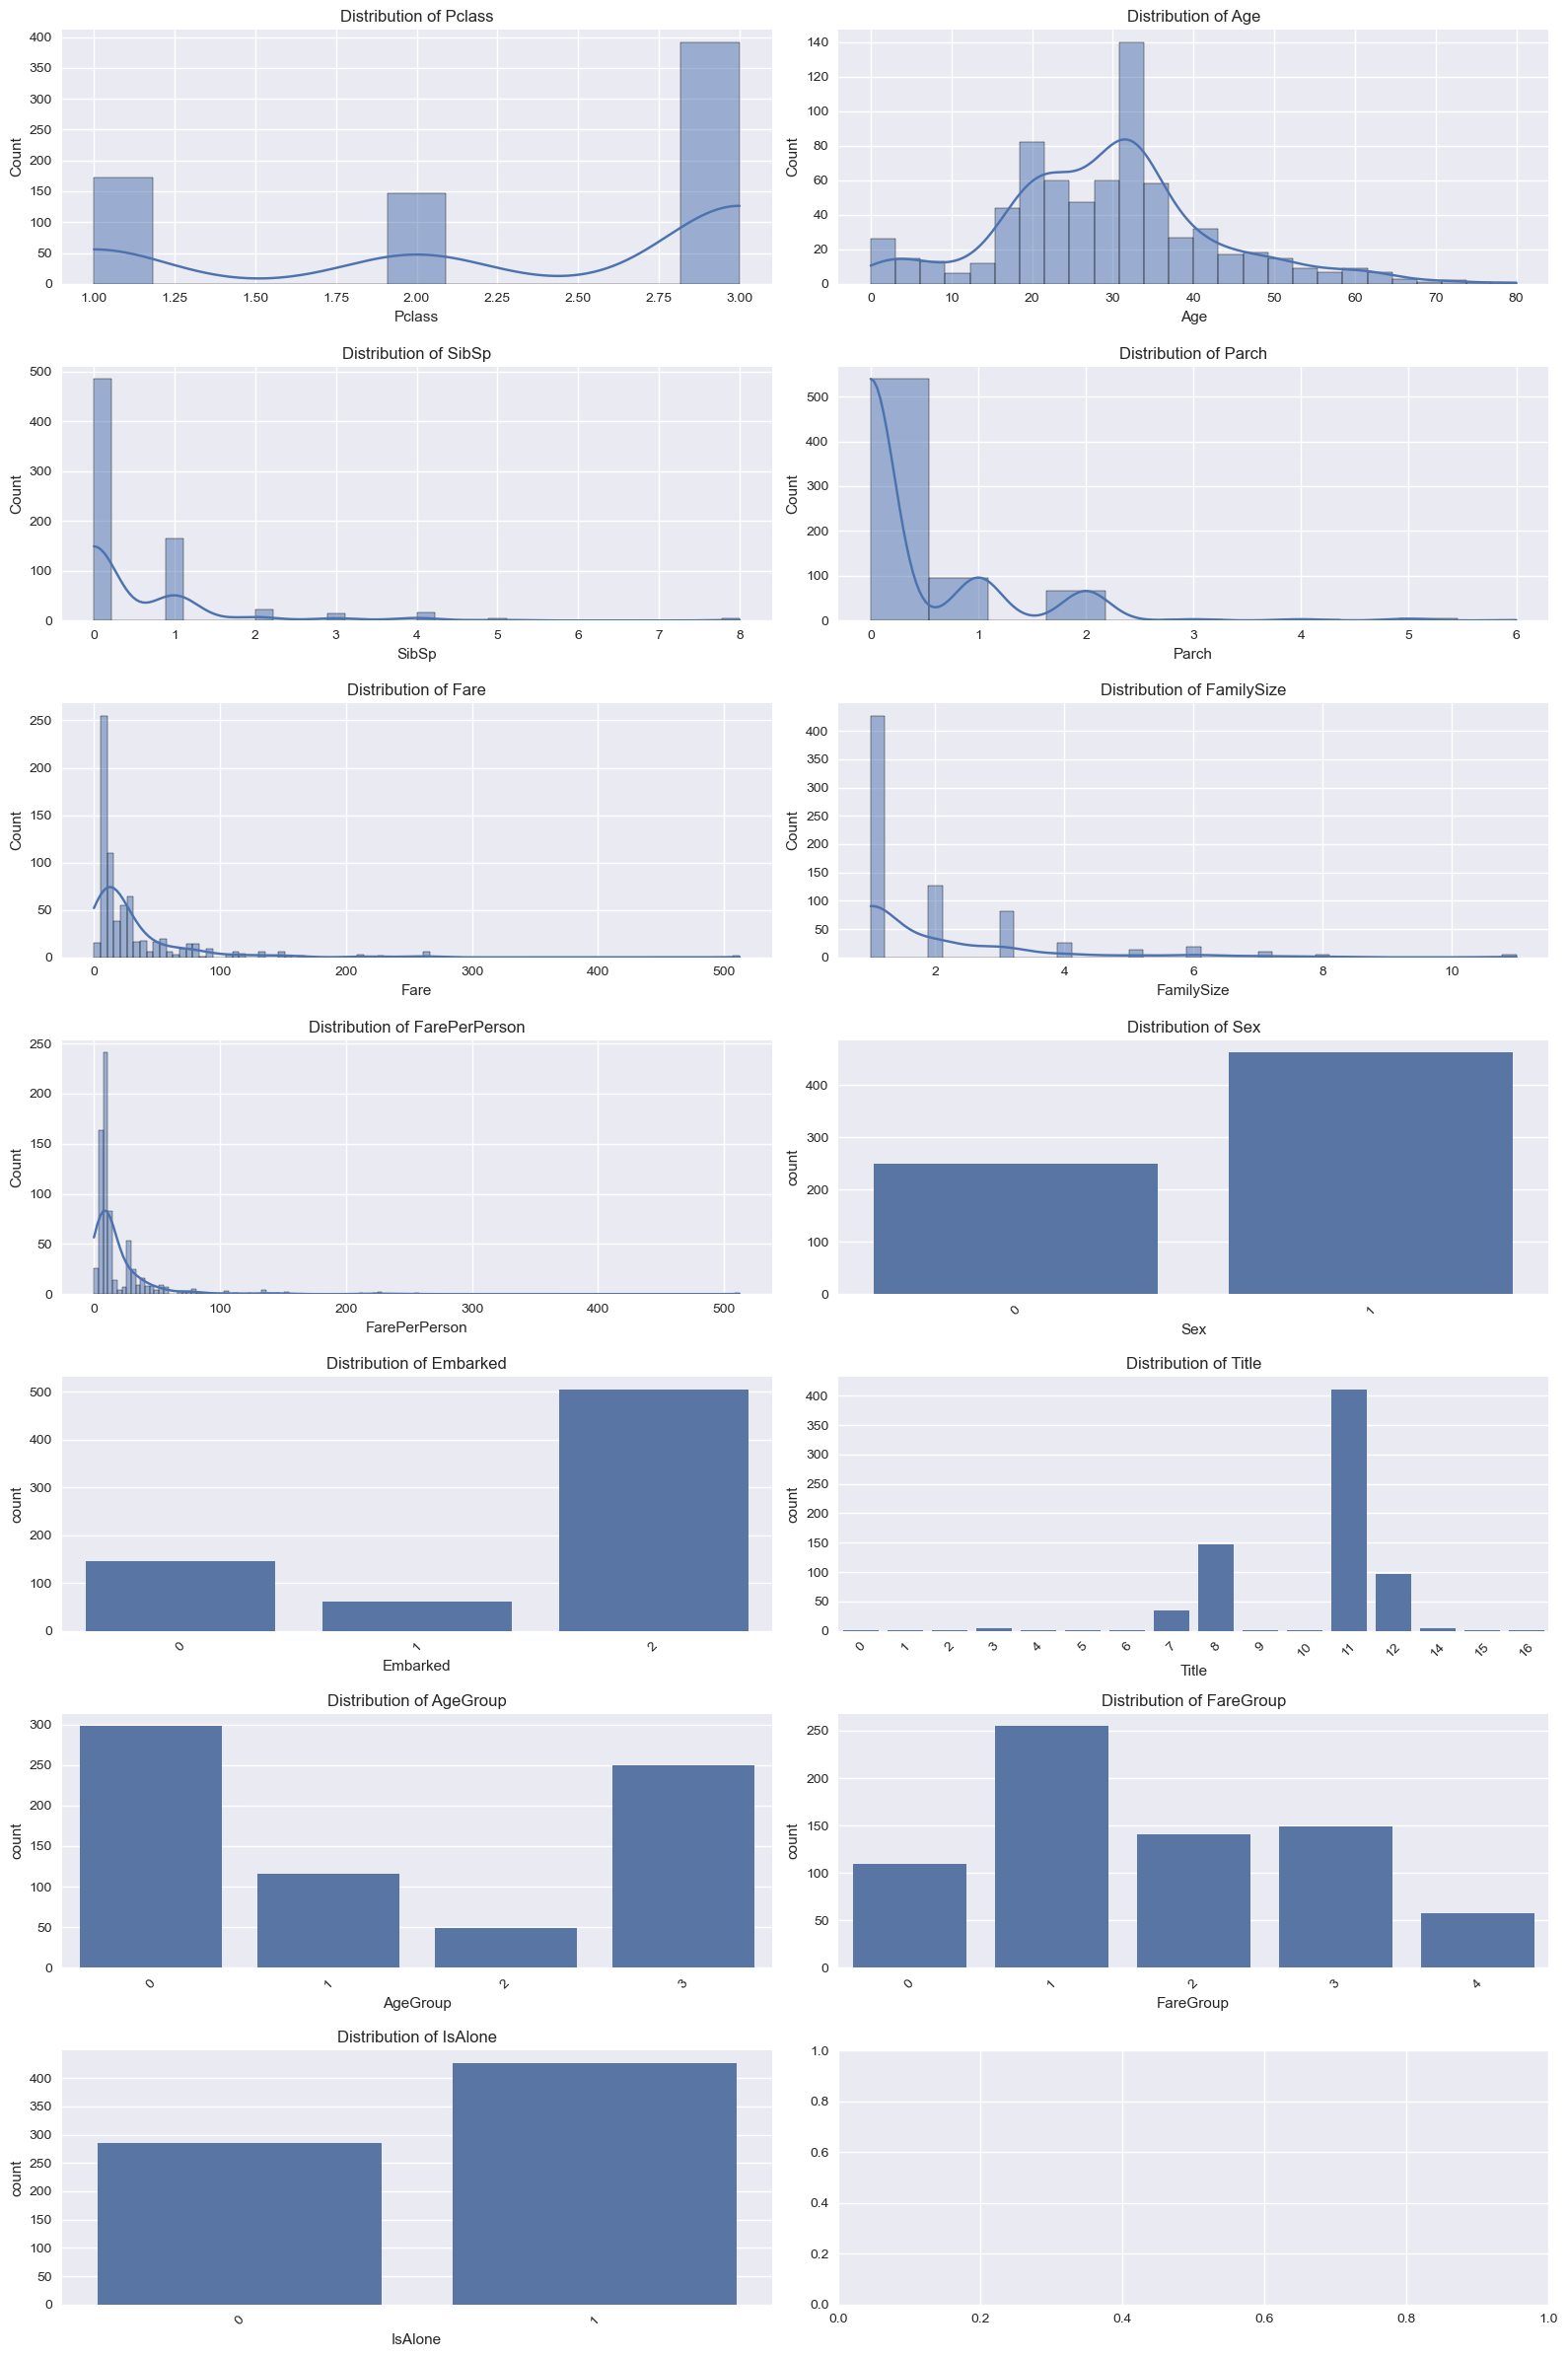

In [165]:
# Plot distribution of each column
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(16, 24))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot numerical columns
for i, column in enumerate(numeric_cols):
    sns.histplot(data=titanic, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Plot categorical columns
for i, column in enumerate(categorical_cols, start=len(numeric_cols)):
    sns.countplot(data=titanic, x=column, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()


In [166]:
# Check for missing values in the training set
missing_values = titanic.isnull().sum()

# Display the missing values
print(missing_values)

Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Title            0
FamilySize       0
IsAlone          0
FarePerPerson    0
AgeGroup         0
FareGroup        0
dtype: int64


In [167]:
# Check the data types of the columns in the train dataset
print(titanic.dtypes)

Survived           int64
Pclass             int64
Sex                int64
Age                int32
SibSp              int64
Parch              int64
Fare             float64
Embarked           int64
Title              int64
FamilySize         int64
IsAlone            int64
FarePerPerson    float64
AgeGroup           int64
FareGroup          int64
dtype: object


In [168]:
# Convert all data types in the DataFrame to integers
titanic = titanic.astype(int)


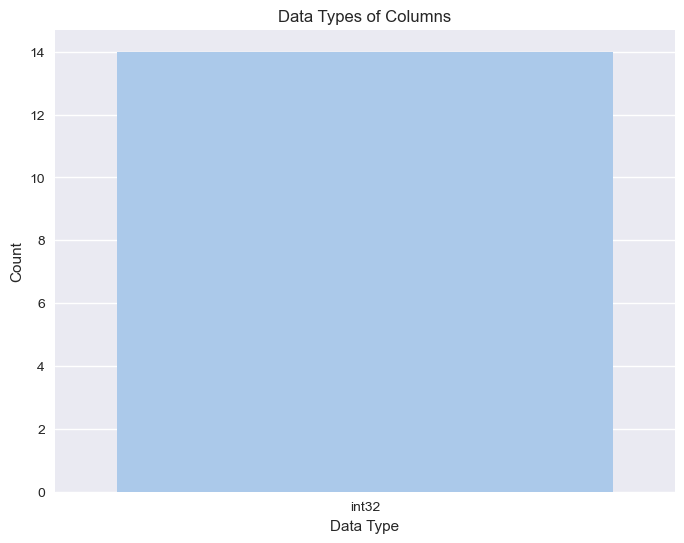

In [169]:
# Get the data types of the columns
data_types = titanic.dtypes.value_counts()

# Plot the data types
plt.figure(figsize=(8, 6))
sns.barplot(x=data_types.index.astype(str), y=data_types.values, palette='pastel')
plt.title('Data Types of Columns')
plt.xlabel('Data Type')
plt.ylabel('Count')
plt.show()

In [170]:

# Display the first few rows to verify the changes
titanic.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FarePerPerson,AgeGroup,FareGroup
820,1,1,0,52,1,1,93,2,12,3,0,31,2,3
439,0,2,1,31,0,0,10,2,11,1,1,10,0,2
821,1,3,1,27,0,0,8,2,11,1,1,8,3,1
403,0,3,1,28,1,0,15,2,11,2,0,7,3,2
343,0,2,1,25,0,0,13,2,11,1,1,13,3,2
514,0,3,1,24,0,0,7,2,11,1,1,7,3,1
40,0,3,0,40,1,0,9,2,12,2,0,4,0,1
101,0,3,1,32,0,0,7,2,11,1,1,7,0,1
93,0,3,1,26,1,2,20,2,11,4,0,5,3,0
81,1,3,1,29,0,0,9,2,11,1,1,9,3,1
